In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib
import statsmodels.api as sm
from statsmodels.api import add_constant

def set_options():
    matplotlib.rcParams.update({'font.size': 15})
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15) 
    matplotlib.rc('axes', titlesize=20) 
    matplotlib.rc('axes', labelsize=15)
    warnings.filterwarnings('ignore')
    plt.style.use('ggplot')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
set_options()
base_path = 'D:/Downloads/holmusk/'

#### bill amount

In [3]:
bill_amount = pd.read_csv(base_path + 'bill_amount.csv')

In [4]:
bill_amount.shape

(13600, 2)

In [5]:
# distribution of bills amount is very right skewed

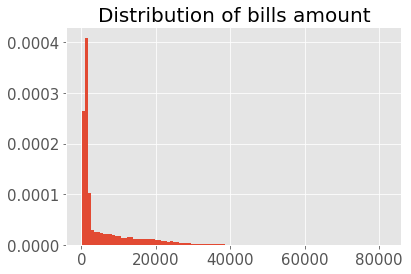

In [6]:
bill_amount['amount'].hist(bins = 100, normed = True)
plt.title('Distribution of bills amount', fontsize = 20)
plt.show()

#### bill id

In [7]:
bill_id = pd.read_csv(base_path + 'bill_id.csv')

In [8]:
bill_id.shape[0]

13600

In [9]:
bill_id.head(5)

bill_id                        patient_id date_of_admission
0  7968360812  1d21f2be18683991eb93d182d6b2d220        2011-01-01
1  6180579974  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
2  7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01
3  3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
4  7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01

In [10]:
# bills data comes with similar regularity over dates

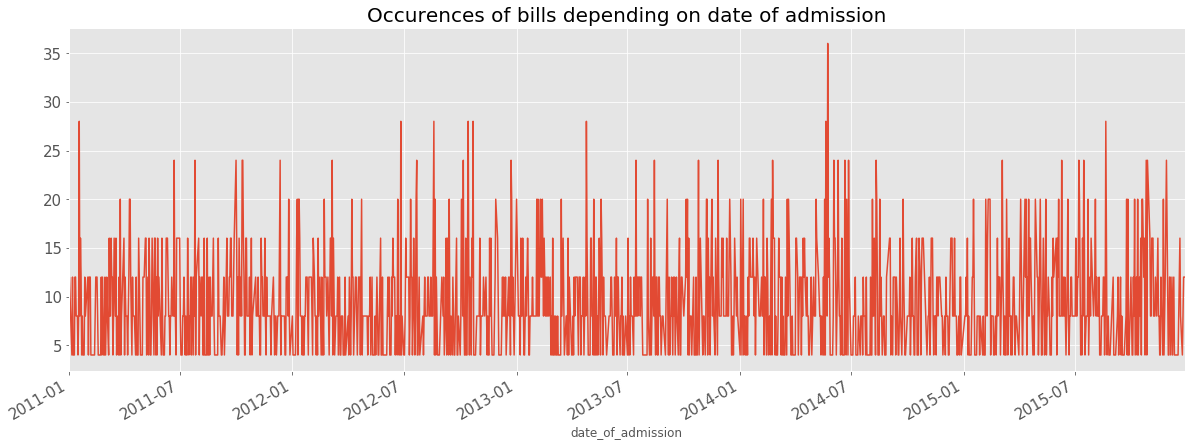

In [11]:
bill_id['date_of_admission'] = pd.to_datetime(bill_id['date_of_admission'], format = '%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,7))
bill_id.groupby('date_of_admission')['bill_id'].count().plot(kind='line', ax = ax)
plt.title('Occurences of bills depending on date of admission', fontsize = 20)
plt.show()

#### demographics

In [12]:
demo = pd.read_csv(base_path + 'demographics.csv')

In [13]:
demo.shape[0]

3000

In [14]:
demo.head(5)

patient_id  gender     race    resident_status  \
0  fa2d818b2261e44e30628ad1ac9cc72c  Female   Indian        Singaporean   
1  5b6477c5de78d0b138e3b0c18e21d0ae       f  Chinese  Singapore citizen   
2  320aa16c61937447fd6631bf635e7fde    Male  Chinese  Singapore citizen   
3  c7f3881684045e6c49020481020fae36    Male    Malay  Singapore citizen   
4  541ad077cb4a0e64cc422673afe28aef       m  Chinese        Singaporean   

  date_of_birth  
0    1971-05-14  
1    1976-02-18  
2    1982-07-03  
3    1947-06-15  
4    1970-12-12

In [15]:
# gender ration seems equal

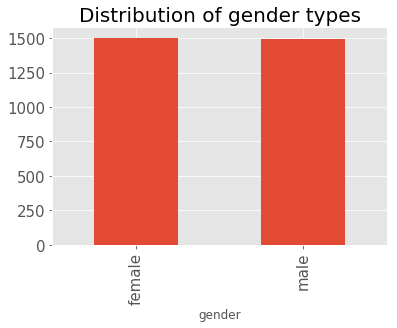

In [16]:
demo['gender'] = demo['gender'].map(lambda x: 'male' if 'f' in x.lower() else 'female')
demo.groupby('gender')['patient_id'].count().plot(kind = 'bar')
plt.title('Distribution of gender types', fontsize = 20)
plt.axis(fontsize = 10)
plt.show()

In [17]:
# most of the patients are chinese

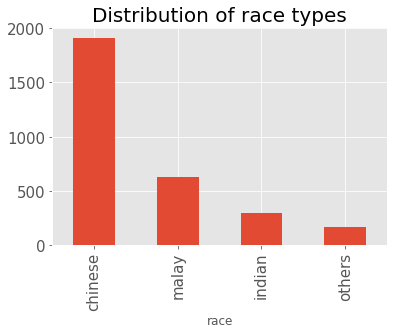

In [18]:
demo['race'] = demo['race'].map(lambda x: 'chinese' if 'chine' in x.lower() else 'malay' if 'malay' in x.lower() else
                               'indian' if 'india' in x.lower() else 'others'
                               )
demo.groupby('race')['patient_id'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Distribution of race types', fontsize = 20)
plt.show()

In [19]:
# most of the patients are singaporeans

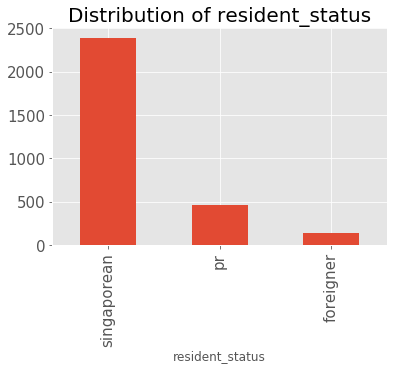

In [20]:
demo['resident_status'] = demo['resident_status'].map(lambda x: 'singaporean' if 'singap' in x.lower() else 'pr' if 'pr' in x.lower() else
                               'foreigner')
demo.groupby('resident_status')['patient_id'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Distribution of resident_status', fontsize = 20)
plt.show()

In [21]:
# make feature binarization

In [22]:
demo['singaporean'] = demo['resident_status'].map(lambda x: 1 if 'singap' in x.lower() else 0)
demo['pr'] = demo['resident_status'].map(lambda x: 1 if 'pr' in x.lower() else 0)

demo['gender'] = demo['gender'].map(lambda x: 1 if 'f' not in x.lower() else 0) 

demo['indian'] = demo['race'].map(lambda x: 1 if 'indian' in x.lower() else 0)
demo['chinese'] = demo['race'].map(lambda x: 1 if 'chin' in x.lower() else 0)
demo['malay'] = demo['race'].map(lambda x: 1 if 'malay' in x.lower() else 0)
demo.drop('race', axis = 1, inplace = True)

In [23]:
# let's look at the clients age distribution

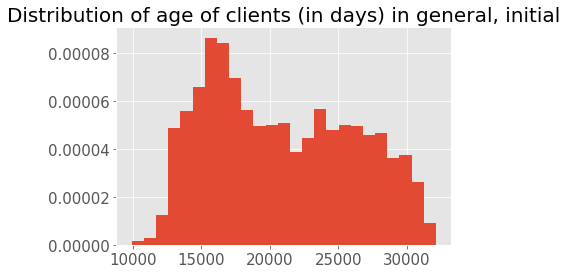

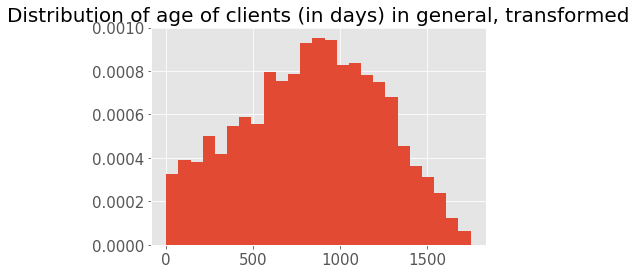

In [24]:
demo['date_of_birth'] = pd.to_datetime(demo['date_of_birth'], format = '%Y-%m-%d')

demo['current_age'] = pd.to_datetime('today') -  demo['date_of_birth']
demo['current_age'] = demo['current_age'].map(lambda x: x.days)

plt.title('Distribution of age of clients (in days) in general, initial', fontsize = 20)
demo['current_age'].hist(bins = 25, normed = True)
plt.show()

plt.title('Distribution of age of clients (in days) in general, transformed', fontsize = 20)
(abs(demo['current_age'] - demo['current_age'].mean())**0.8).hist(bins = 25, normed = True)

plt.show()

In [25]:
demo.drop(['resident_status'], axis = 1, inplace = True)

#### clinical data

In [26]:
clinic = pd.read_csv(base_path + 'clinical_data.csv')

In [27]:
clinic.shape[0]

3400

In [28]:
clinic[['id', 'date_of_admission']].shape[0]

3400

In [29]:
clinic.head(5)

id date_of_admission date_of_discharge  \
0  1d21f2be18683991eb93d182d6b2d220        2011-01-01        2011-01-11   
1  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01        2011-01-11   
2  c85cf97bc6307ded0dd4fef8bad2fa09        2011-01-02        2011-01-13   
3  e0397dd72caf4552c5babebd3d61736c        2011-01-02        2011-01-14   
4  94ade3cd5f66f4584902554dff170a29        2011-01-08        2011-01-16   

   medical_history_1  medical_history_2 medical_history_3  medical_history_4  \
0                  0                1.0                 0                  0   
1                  0                0.0                 0                  0   
2                  0                0.0                 0                  0   
3                  0                1.0                No                  0   
4                  0                0.0                No                  0   

   medical_history_5  medical_history_6  medical_history_7   ...    symptom_1  \
0                0.0                  0                  0   ...            0   
1                0.0                  0                  0   ...            0   
2                0.0                  0                  0   ...            1   
3                0.0                  1                  1   ...            1   
4                0.0                  1                  1   ...            0   

   symptom_2  symptom_3  symptom_4  symptom_5  lab_result_1  lab_result_2  \
0          0          0          1          1          13.2          30.9   
1          0          1          1          1          13.8          22.6   
2          1          1          1          0          11.2          26.2   
3          1          1          1          1          13.3          28.4   
4          1          0          1          0          12.0          27.8   

   lab_result_3  weight  height  
0         123.0    71.3   161.0  
1          89.0    78.4   160.0  
2         100.0    72.0   151.0  
3          76.0    64.4   152.0  
4          87.0    55.6   160.0  

[5 rows x 26 columns]

In [30]:
# on-the-go we generate feature STAY_TIME - it's a number of days that patient spent at the clinic

In [31]:
clinic['date_of_admission'] = pd.to_datetime(clinic['date_of_admission'], format = '%Y-%m-%d')
clinic['date_of_discharge'] = pd.to_datetime(clinic['date_of_discharge'], format = '%Y-%m-%d')

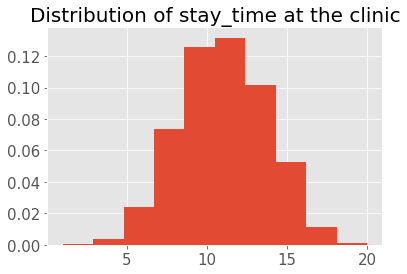

In [32]:
clinic['stay_time'] = clinic['date_of_discharge'] -  clinic['date_of_admission']
clinic['stay_time'] = clinic['stay_time'].map(lambda x: x.days)

clinic['stay_time'].hist(bins = 10, normed = True)
plt.title('Distribution of stay_time at the clinic', fontsize = 20)

plt.show()

In [33]:
# look at the weight distribution

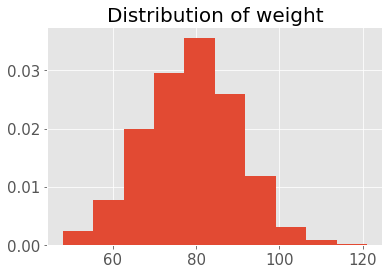

In [34]:
clinic['weight'].hist(bins = 10, normed = True)
plt.title('Distribution of weight', fontsize = 20)

plt.show()

In [35]:
# look at the height distribution

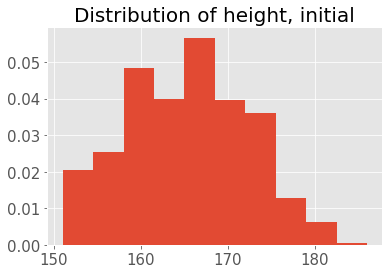

In [36]:
clinic['height'].hist(bins = 10, normed = True)
plt.title('Distribution of height, initial', fontsize = 20)
plt.show()

# np.log(clinic['height']).hist(bins = 10, normed = True)
# plt.title('Distribution of height, log-transfromed', fontsize = 20)
# plt.show()

In [37]:
# generate a mass index feature (kilogramms of weight on one santimeter of height) and look at the distribution

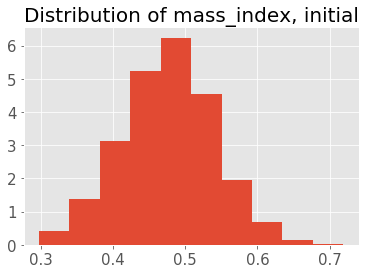

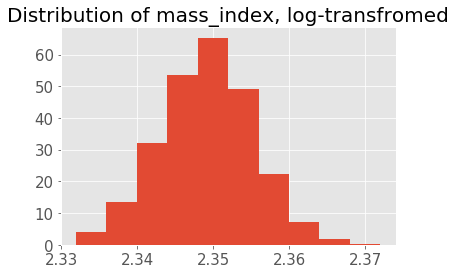

In [38]:
clinic['mass_index'] = clinic['weight'] / clinic['height']

plt.title('Distribution of mass_index, initial', fontsize = 20)
clinic['mass_index'].hist(bins = 10, normed = True)
plt.show()

plt.title('Distribution of mass_index, log-transfromed', fontsize = 20)
np.log(clinic['mass_index'] + 10).hist(bins = 10, normed = True)
plt.show()

In [39]:
# check missing values and fill them out with 0

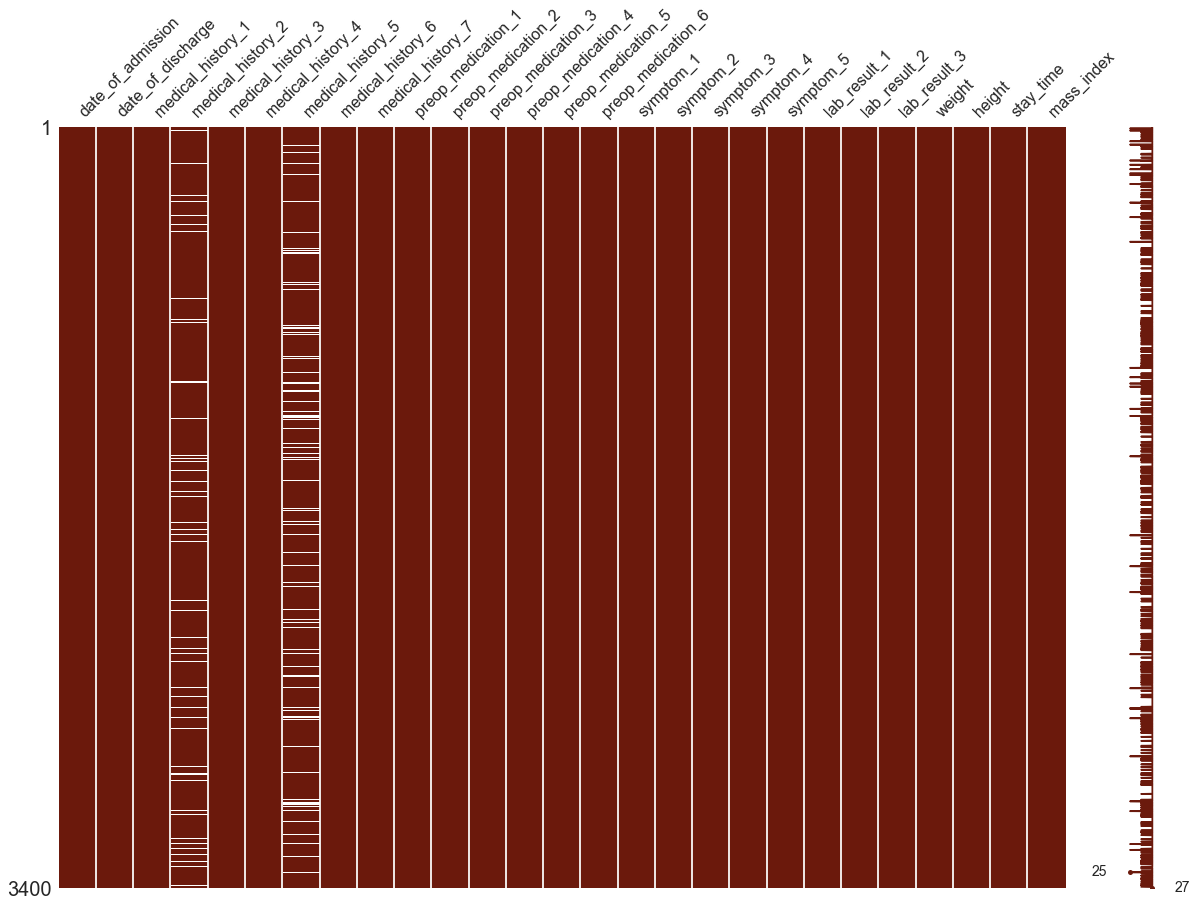

In [40]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=clinic.iloc[:,1:], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [41]:
clinic.fillna(0, inplace = True)

In [42]:
# binarize features

In [43]:
for c in clinic.columns:
    if 'history' in c or 'medication' in c or 'symptom' in c:
        clinic[c] = clinic[c].map(lambda x: x if str(x).lower() not in ['yes', 'no']
                                 else 1 if str(x).lower() == 'yes' else 0
                                 )
        clinic[c] = clinic[c].astype(int)

#### check distribution of binary featuries

In [44]:
# med histories

In [45]:
plt.style.use('ggplot')

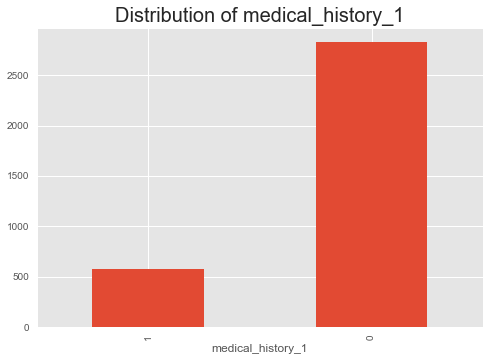

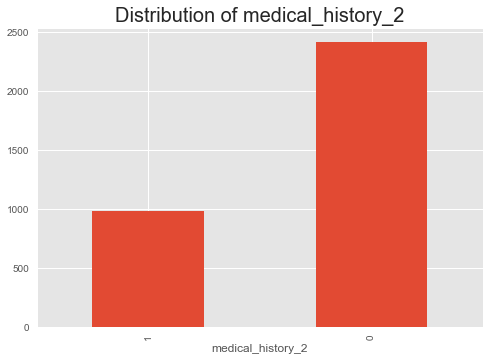

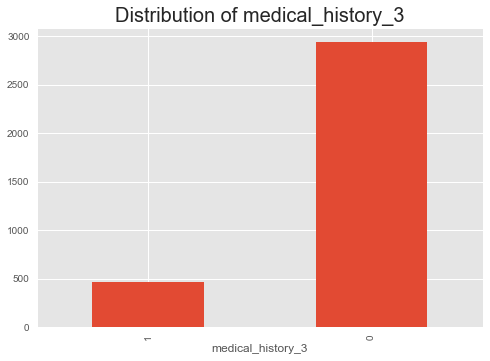

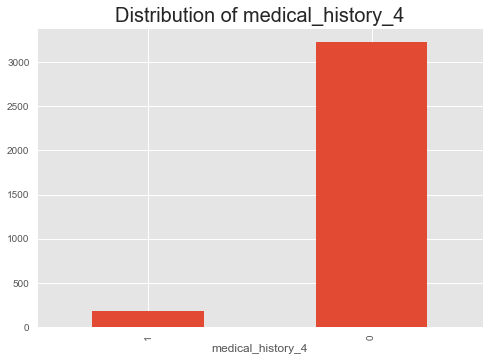

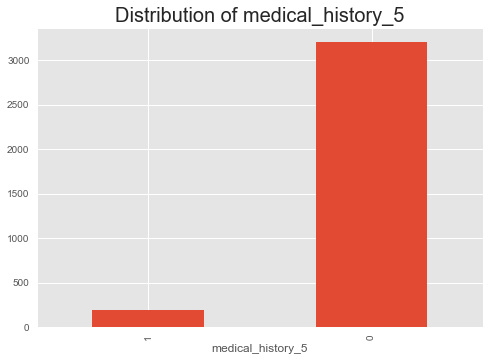

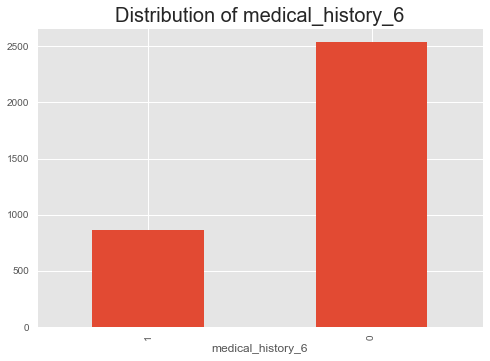

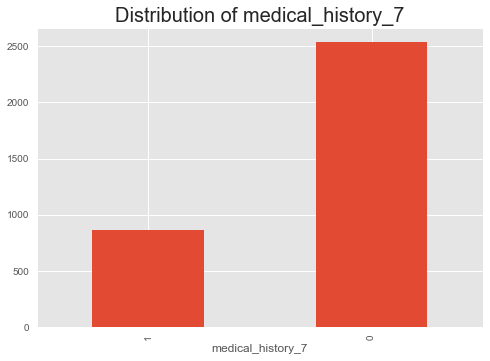

In [46]:
cols = [c for c in clinic.columns if 'history' in c]
for c in cols:
    clinic.groupby(c)['id'].count().sort_values(ascending = True).plot(kind = 'bar')
    plt.title('Distribution of %s' %c, fontsize = 20)
    plt.show()

In [47]:
# preop medication

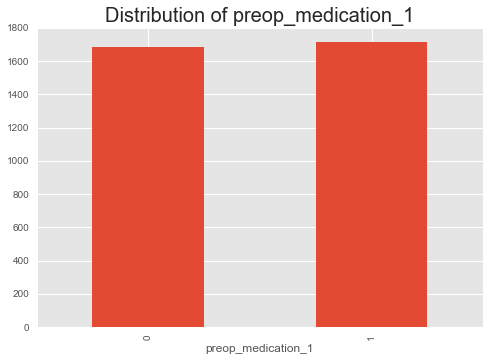

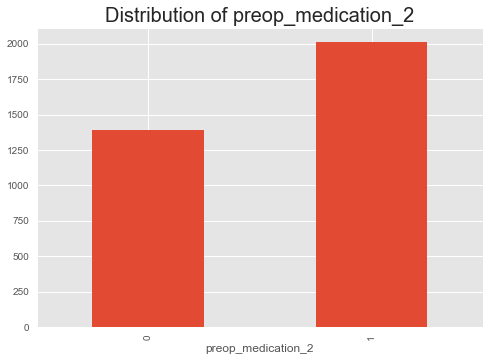

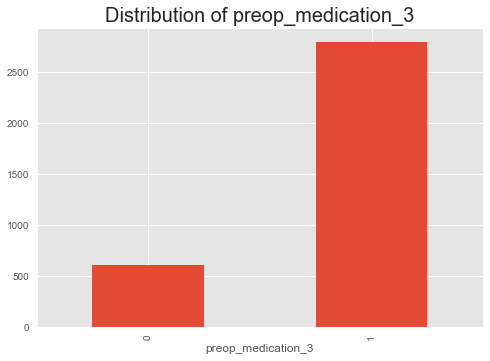

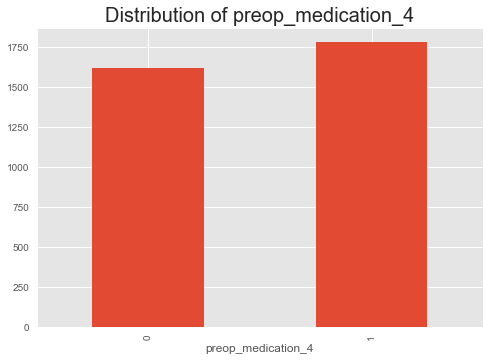

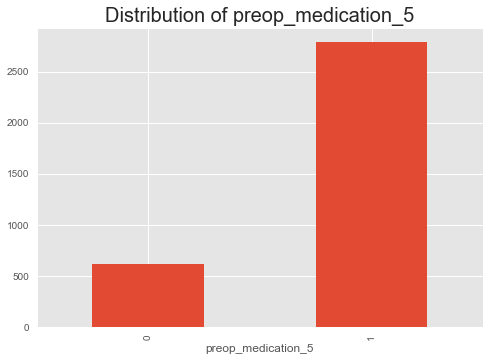

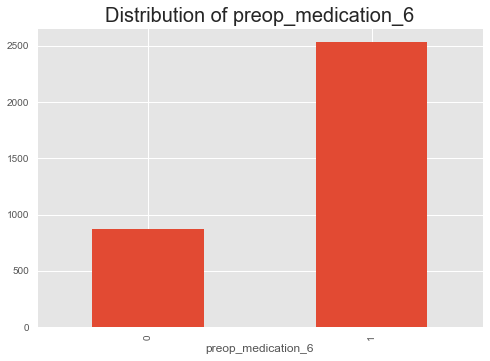

In [48]:
cols = [c for c in clinic.columns if 'preop' in c]
for c in cols:
    clinic.groupby(c)['id'].count().sort_values(ascending = True).plot(kind = 'bar')
    plt.title('Distribution of %s' %c, fontsize = 20)
    plt.show()

In [49]:
# symptoms

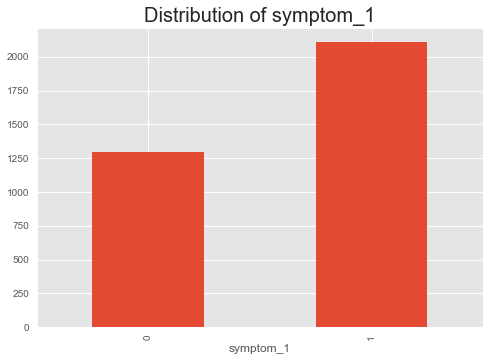

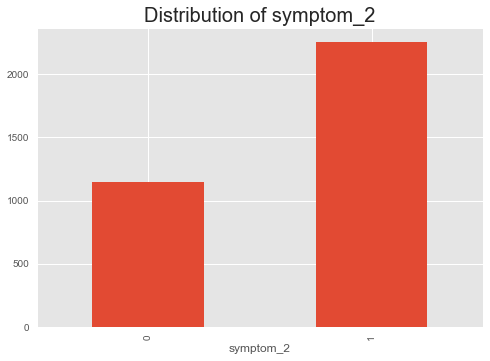

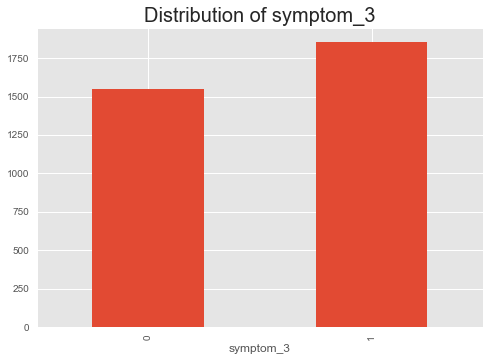

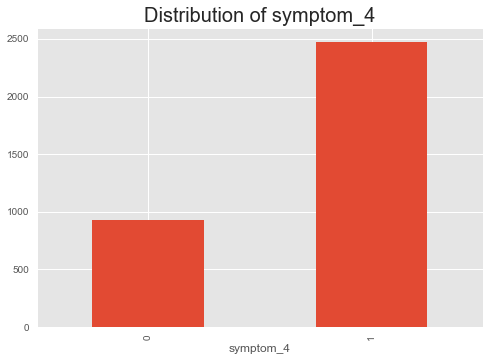

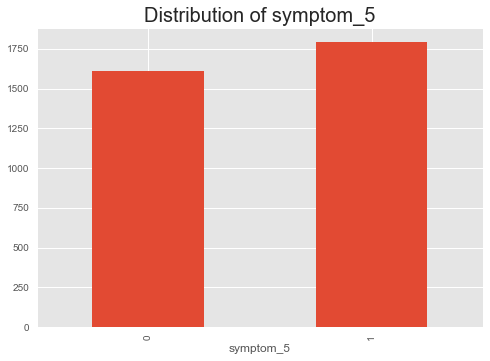

In [50]:
cols = [c for c in clinic.columns if 'symptom' in c]
for c in cols:
    clinic.groupby(c)['id'].count().sort_values(ascending = True).plot(kind = 'bar')
    plt.title('Distribution of %s' %c, fontsize = 20)
    plt.show()

In [51]:
# no correlation among these binary features

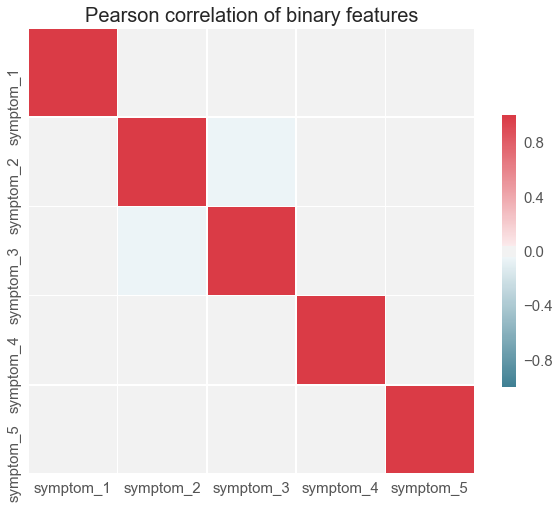

In [52]:
import seaborn as sns 

set_options()
pearson = clinic[cols].corr(method='pearson')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pearson, cmap=cmap, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Pearson correlation of binary features', fontsize = 20)
plt.show()

In [53]:
# check distribution of lab results => they look normal

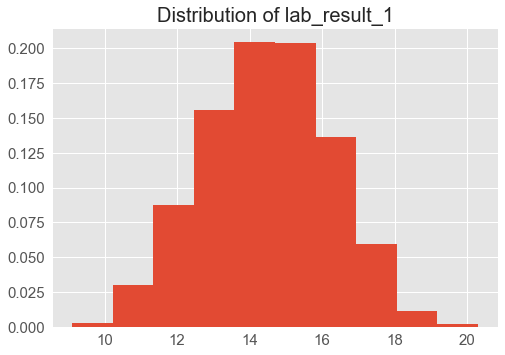

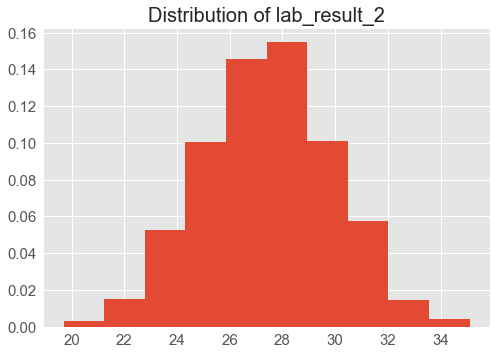

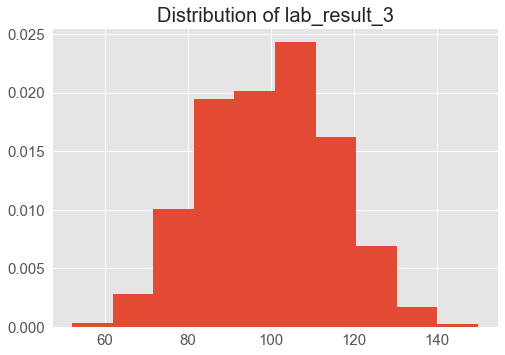

In [54]:
for c in ['lab_result_1', 'lab_result_2', 'lab_result_3']:
    clinic[c].hist(bins = 10, normed = True)
    plt.title('Distribution of %s' %c, fontsize = 20)
    plt.show()

#### start agregating data

In [55]:
clinic_demo = pd.merge(clinic, demo, how = 'left', left_on = 'id', right_on = 'patient_id')
clinic_demo_bill = pd.merge(clinic_demo, bill_id, how = 'left', left_on = ['patient_id', 'date_of_admission'],
                            right_on = ['patient_id', 'date_of_admission'])
clinic_demo_bill = pd.merge(clinic_demo_bill, bill_amount, how = 'left', left_on = 'bill_id', right_on = 'bill_id')

In [56]:
clinic_demo_bill.shape[0], clinic.shape[0]

(13600, 3400)

In [57]:
clinic_demo_bill.columns

Index(['id', 'date_of_admission', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height',
       'stay_time', 'mass_index', 'patient_id', 'gender', 'date_of_birth',
       'singaporean', 'pr', 'indian', 'chinese', 'malay', 'current_age',
       'bill_id', 'amount'],
      dtype='object')

In [58]:
agg_cols = ['id', 'date_of_admission', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height', 'stay_time', 'mass_index',
       'patient_id', 'gender', 'indian', 'chinese', 'malay', 'singaporean', 'pr','date_of_birth']

clinic_demo_bill = clinic_demo_bill.fillna(0).groupby(agg_cols)['amount'].sum().reset_index()

In [59]:
clinic_demo_bill['age_when_admission'] = clinic_demo_bill['date_of_admission'] - clinic_demo_bill['date_of_birth']

clinic_demo_bill['age_when_admission'] = clinic_demo_bill['age_when_admission'].map(lambda x: x.days)

In [60]:
# check distribution of bills amount

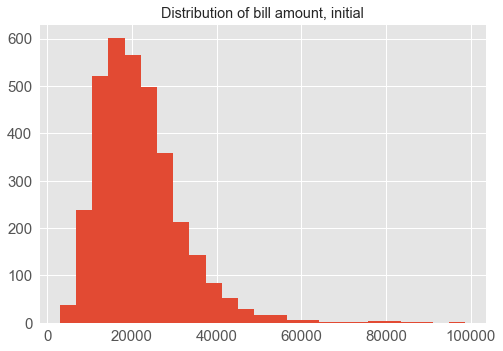

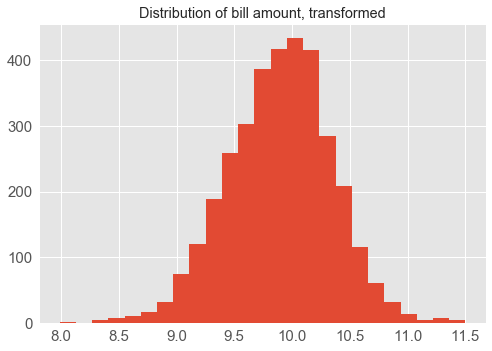

In [61]:
clinic_demo_bill['amount'].hist(bins = 25)
plt.title('Distribution of bill amount, initial')
plt.show()

np.log(clinic_demo_bill['amount']).hist(bins = 25)
plt.title('Distribution of bill amount, transformed')
plt.show()

In [62]:
clinic_demo_bill['amount'] = np.log(clinic_demo_bill['amount'])

In [63]:
# check the distribution of age_when_admission

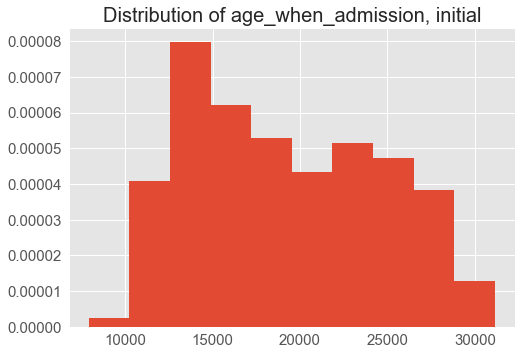

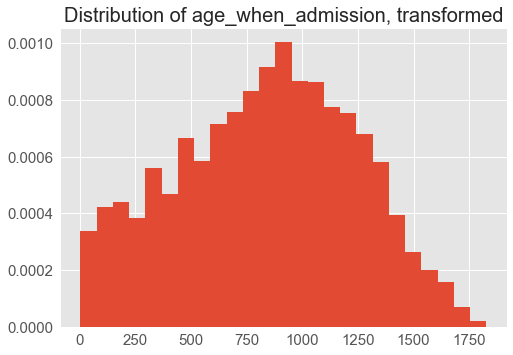

In [64]:
clinic_demo_bill['age_when_admission'].hist(bins = 10, normed = True)
plt.title('Distribution of age_when_admission, initial', fontsize = 20)
plt.show()

plt.title('Distribution of age_when_admission, transformed', fontsize = 20)
(abs(clinic_demo_bill['age_when_admission'] - clinic_demo_bill['age_when_admission'].mean())**0.8).hist(bins = 25, normed = True)

plt.show()

In [65]:
# transfrom age distribution by splitting it around 0

In [66]:
clinic_demo_bill['age_when_admission'] = clinic_demo_bill['age_when_admission'] - clinic_demo_bill['age_when_admission'].mean()

In [67]:
# let's look at the bill amounts over dates => we see that it looks stationary
# also we see peaks on July months

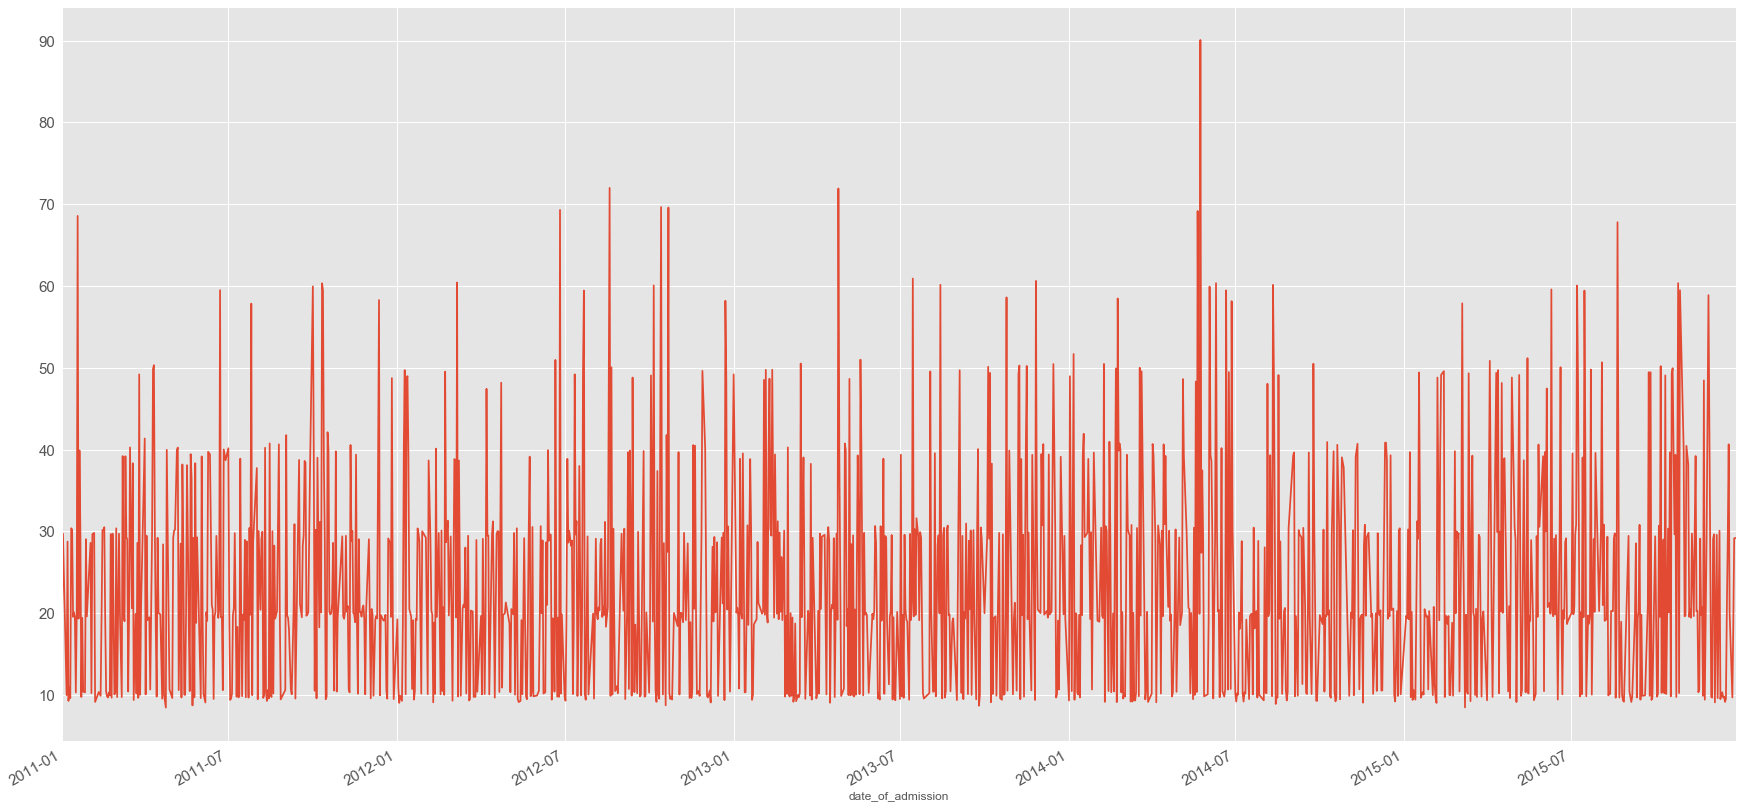

In [68]:
fig, ax = plt.subplots(figsize=(30,15))
clinic_demo_bill.groupby('date_of_admission')['amount'].sum().plot(x='date_of_admission', y='amount', ax = ax)
plt.show()

#### At the correlation heatmap we see correlation between amount and symptom_5, age, malay race, chinese race, medical_history_1,
#### Also we see correlation among some predictors. In the future we should check VIF values to get rif of redundant features

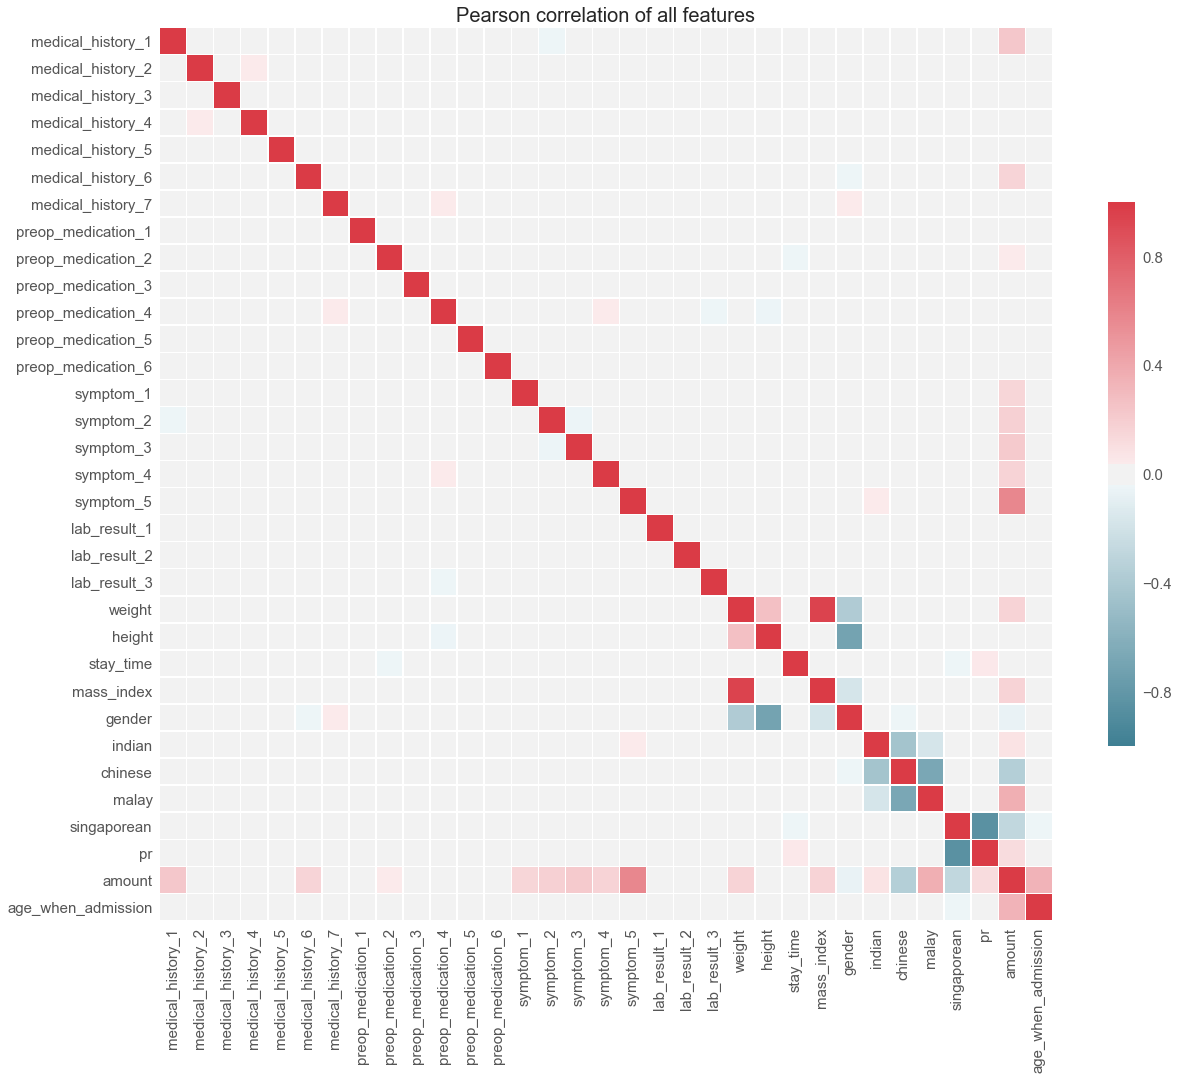

In [69]:
set_options()
cols = [c for c in clinic_demo_bill.columns if c not in ['id', 'date_of_admission', 'date_of_birth',
                                                        'date_of_discharge'
                                                        ] and clinic_demo_bill[c].dtype != 'object']

pearson = clinic_demo_bill[cols].corr(method='pearson')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pearson, cmap=cmap, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Pearson correlation of all features', fontsize = 20)
plt.show()

#### check how bill amount depends on features separately

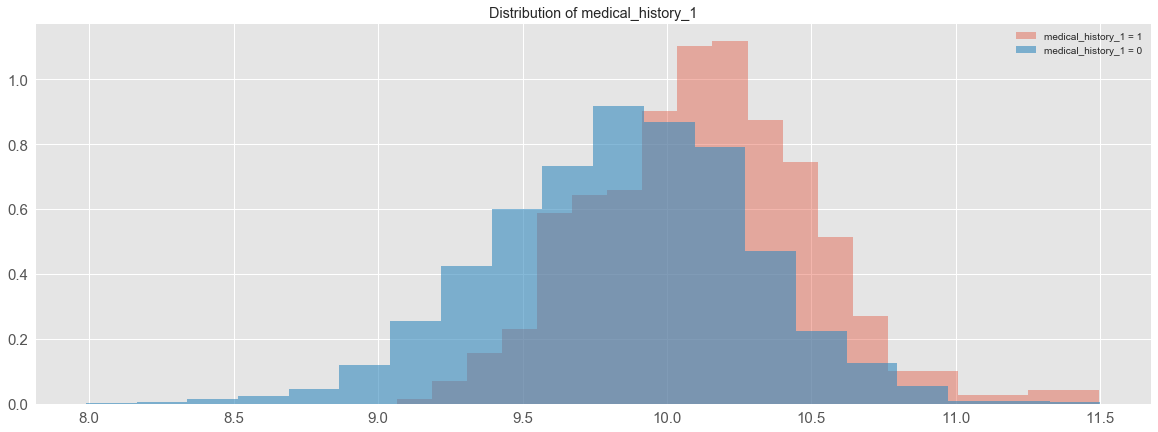

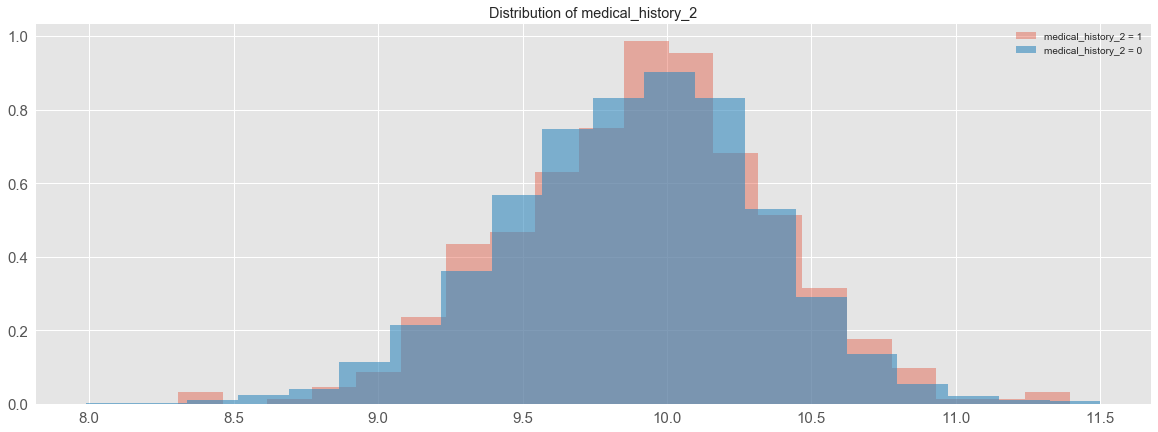

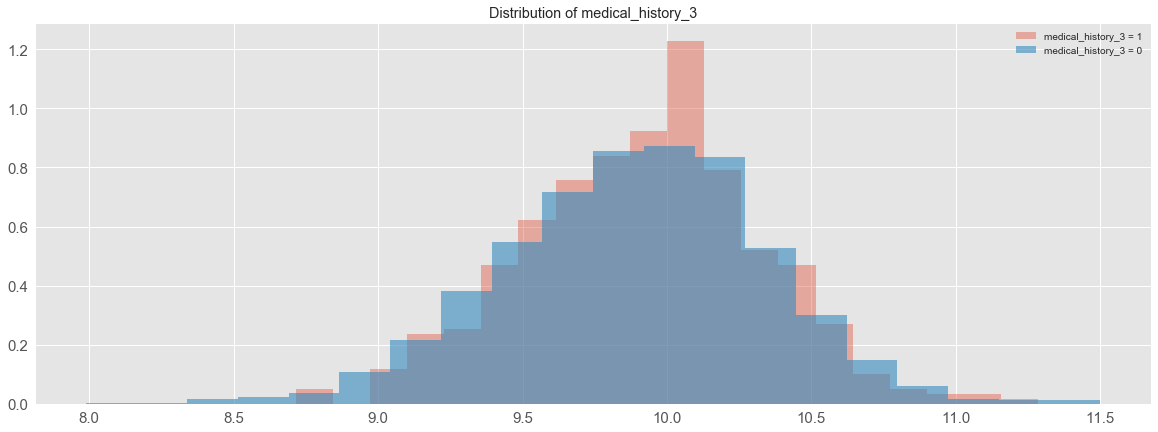

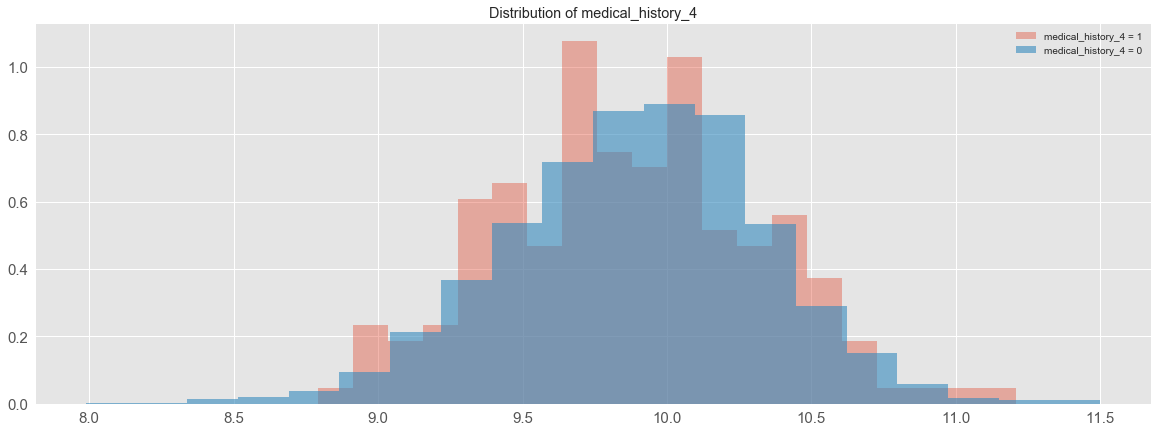

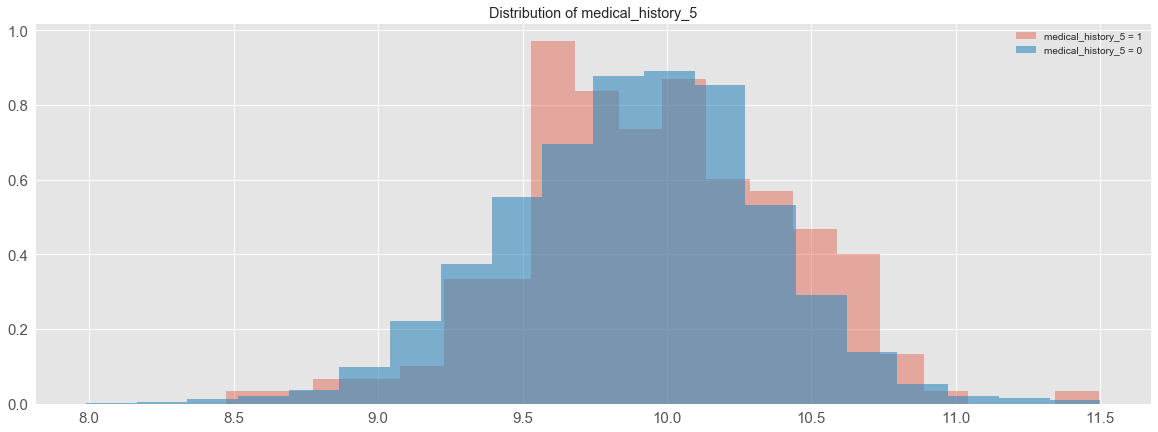

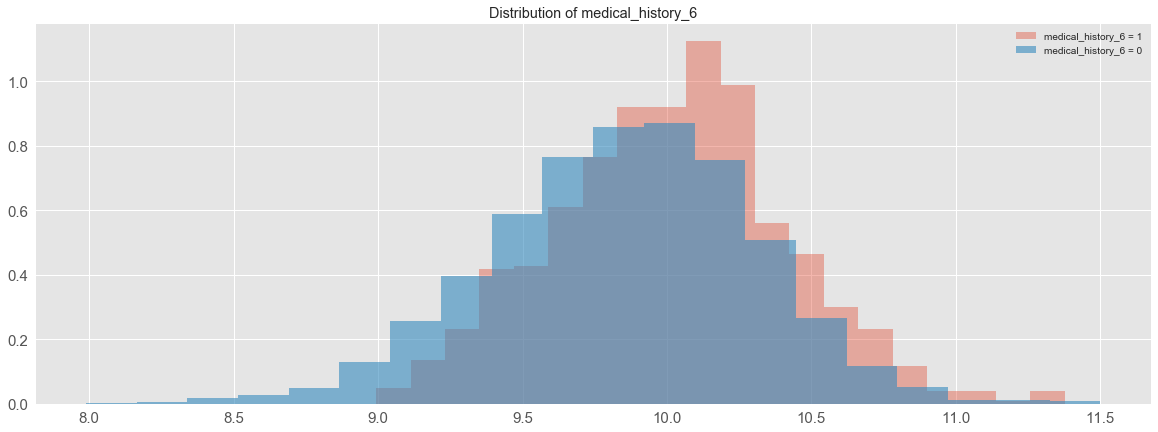

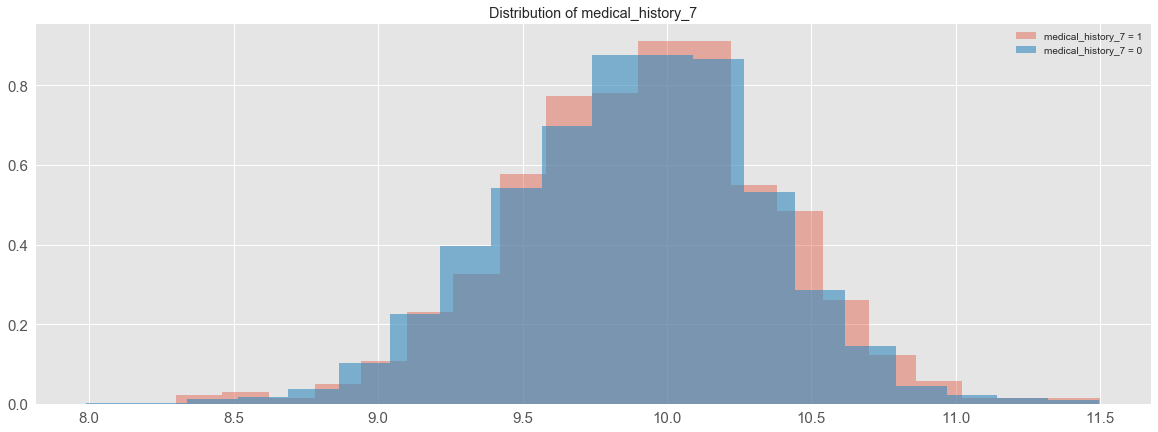

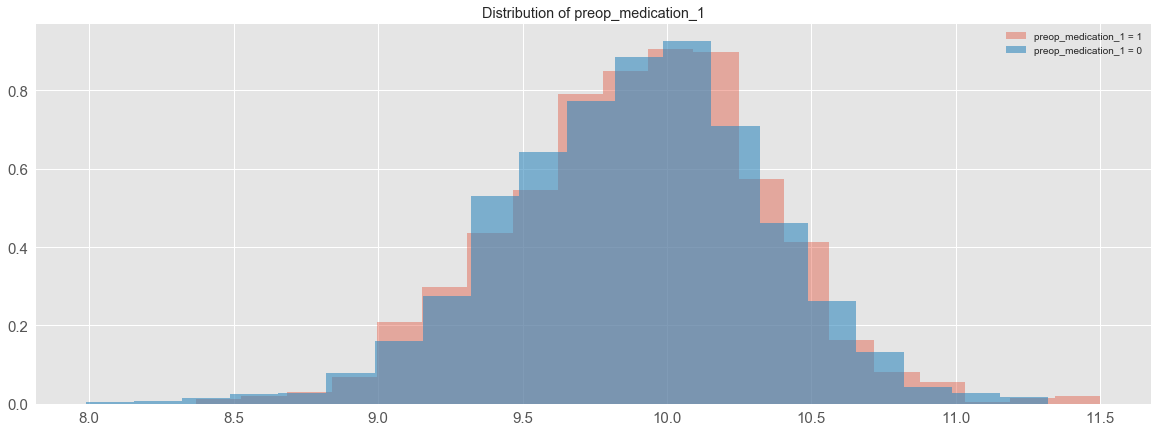

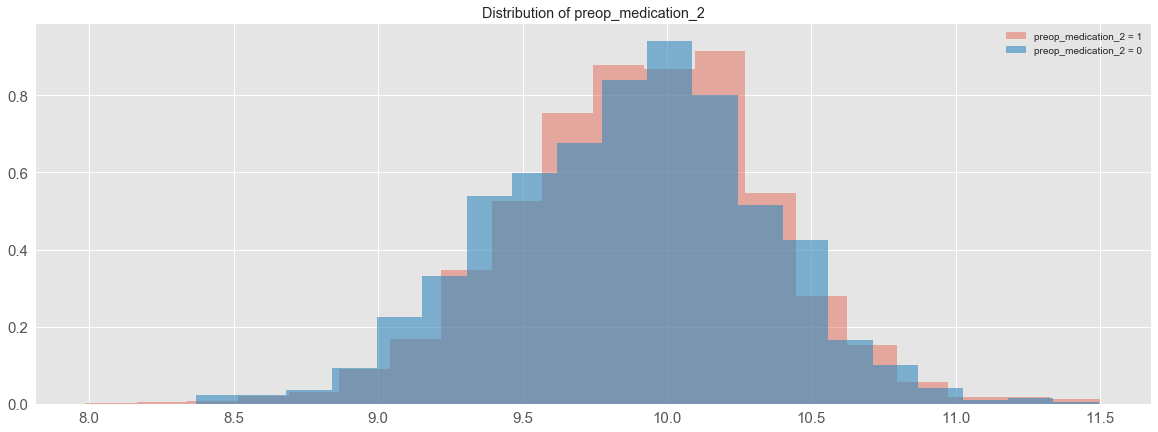

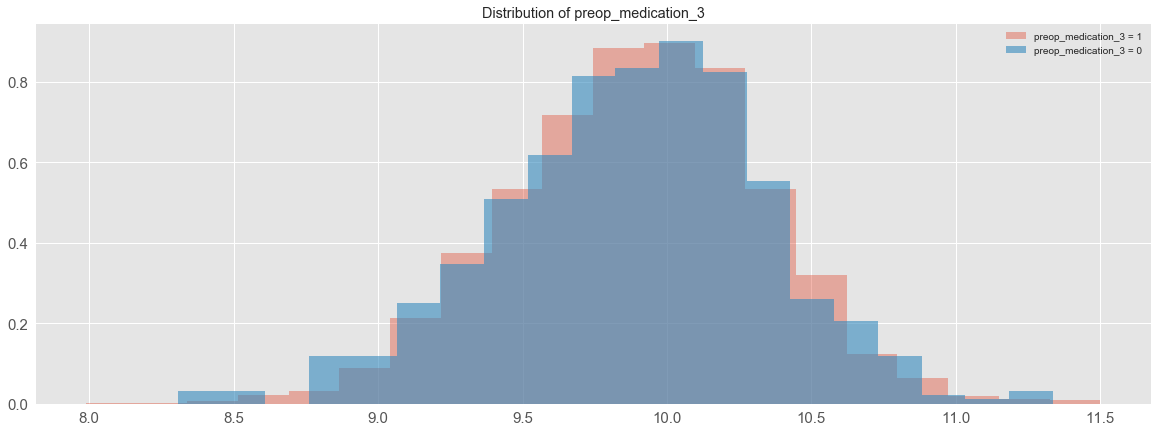

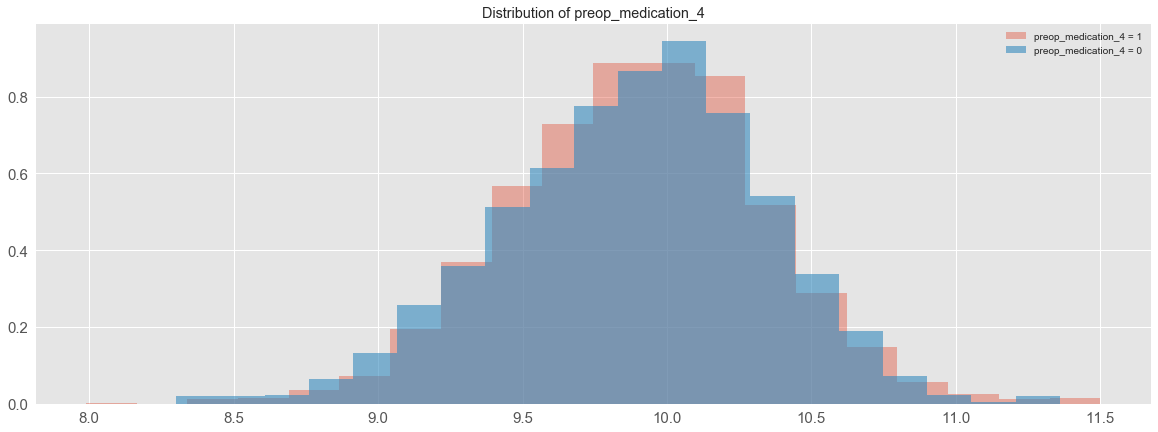

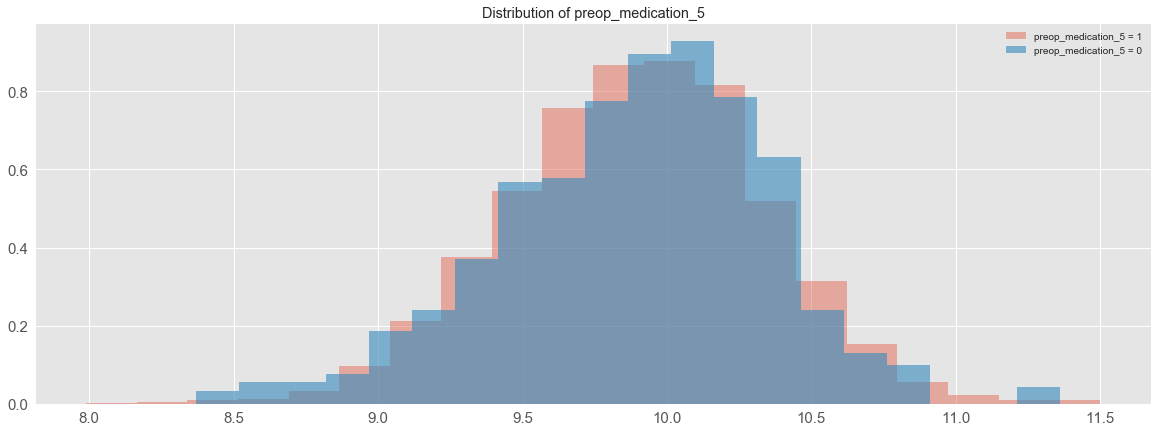

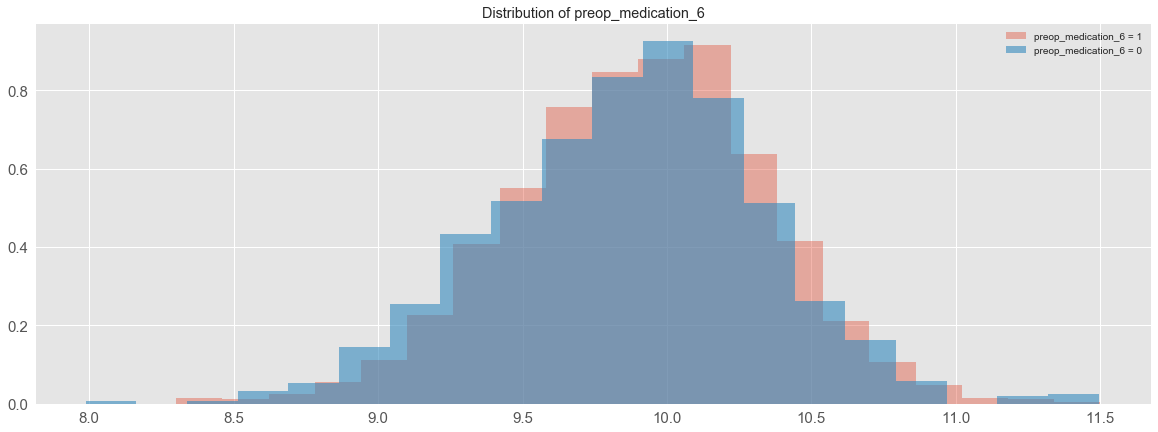

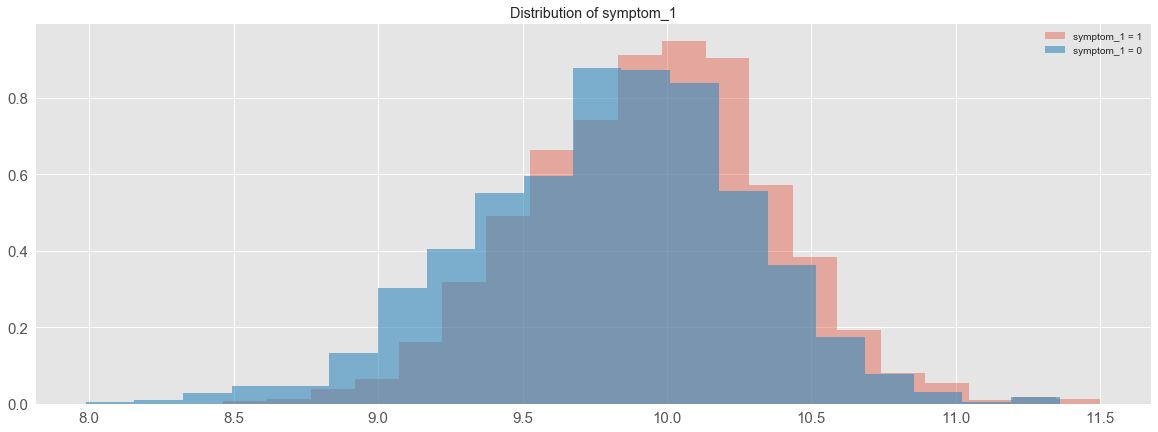

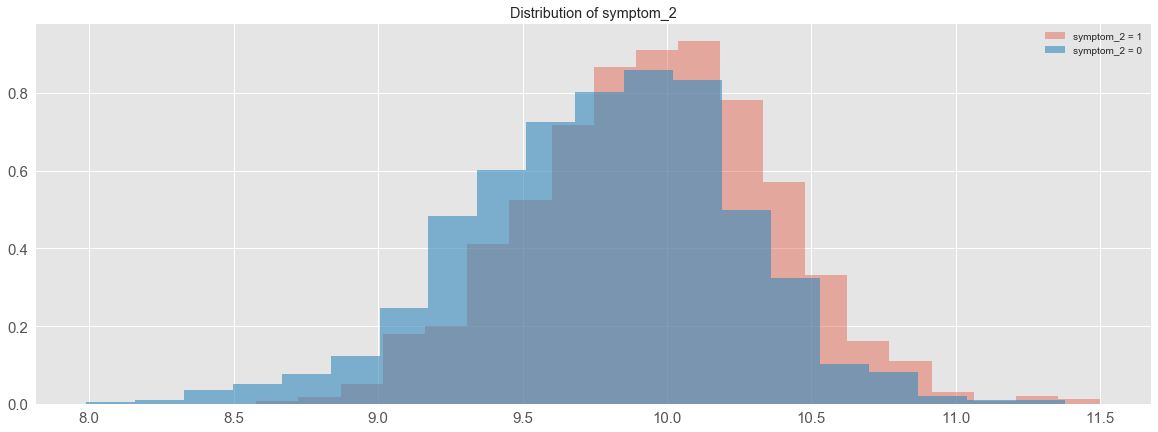

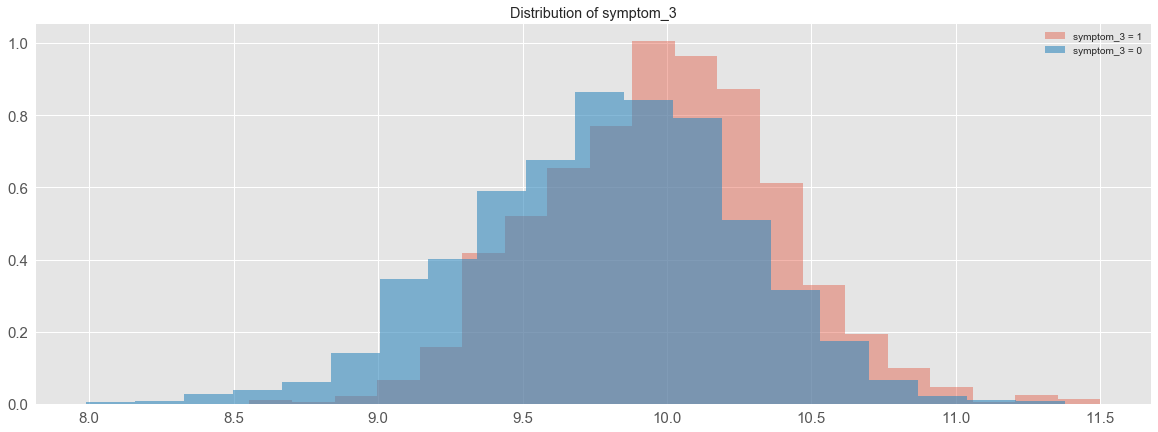

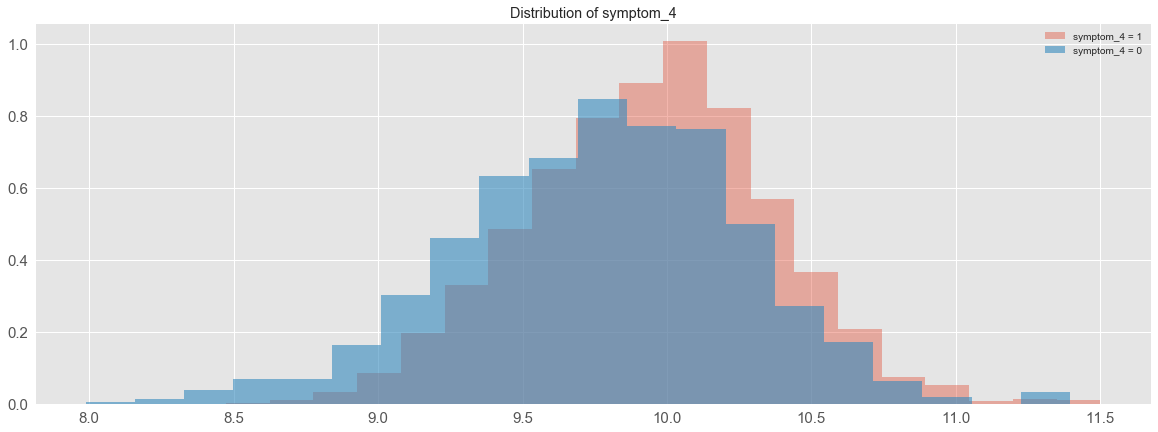

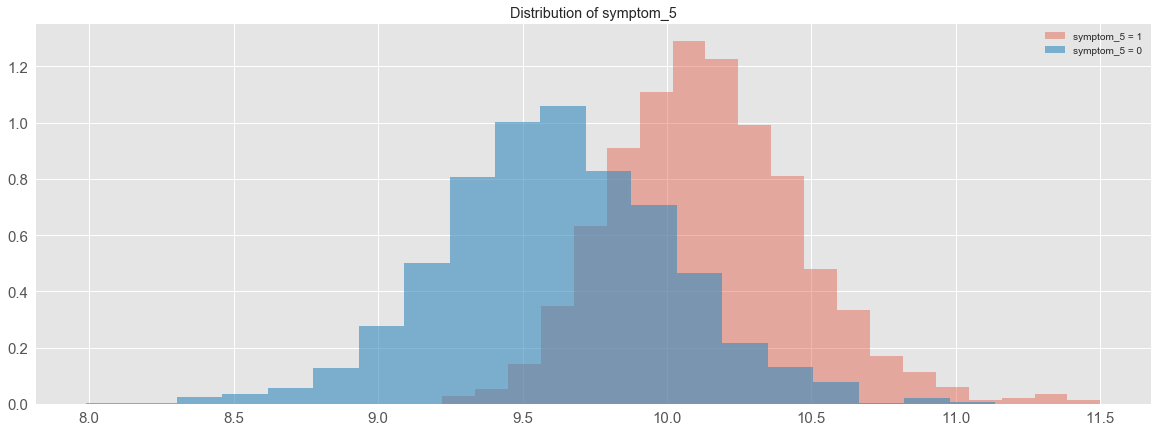

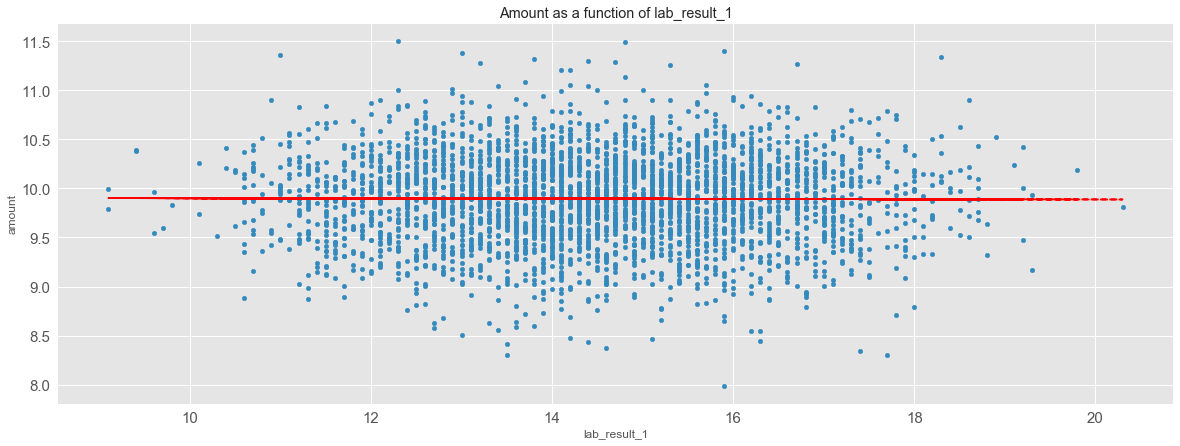

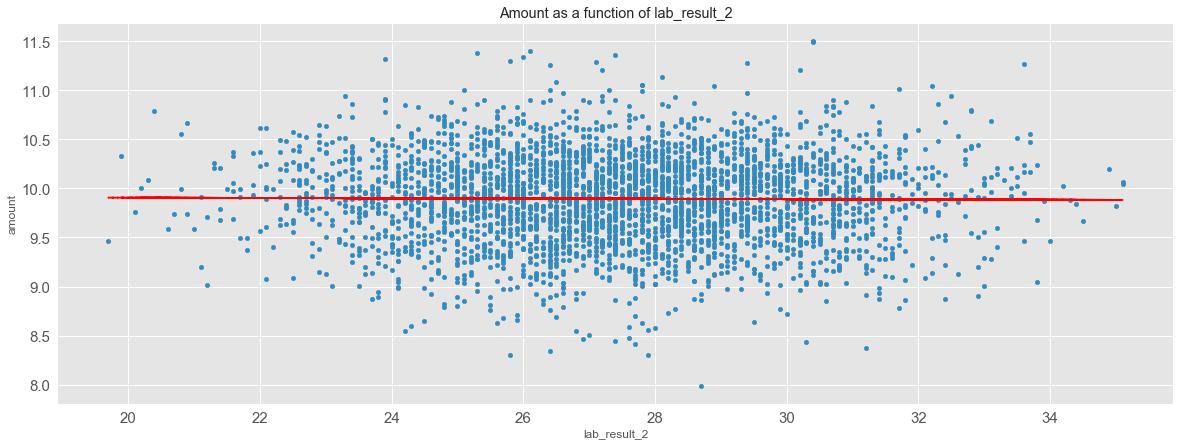

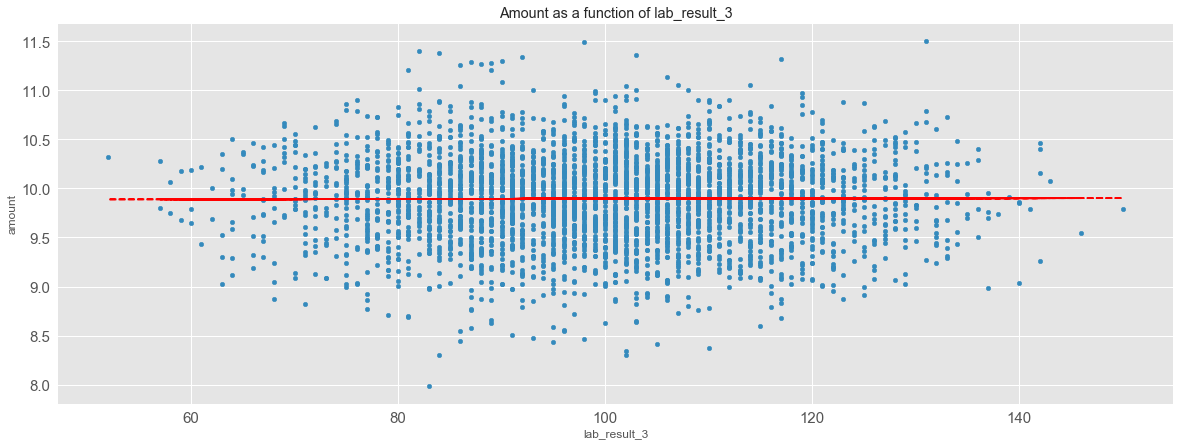

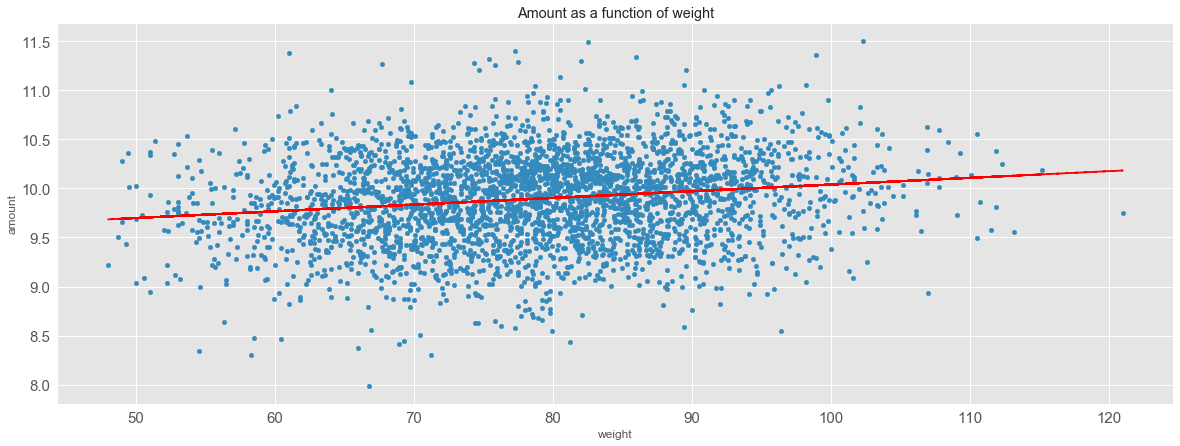

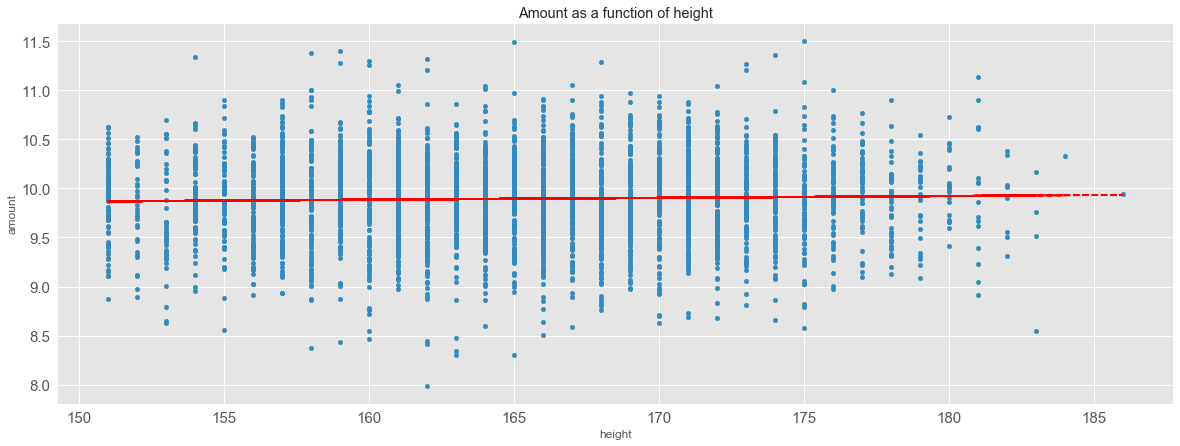

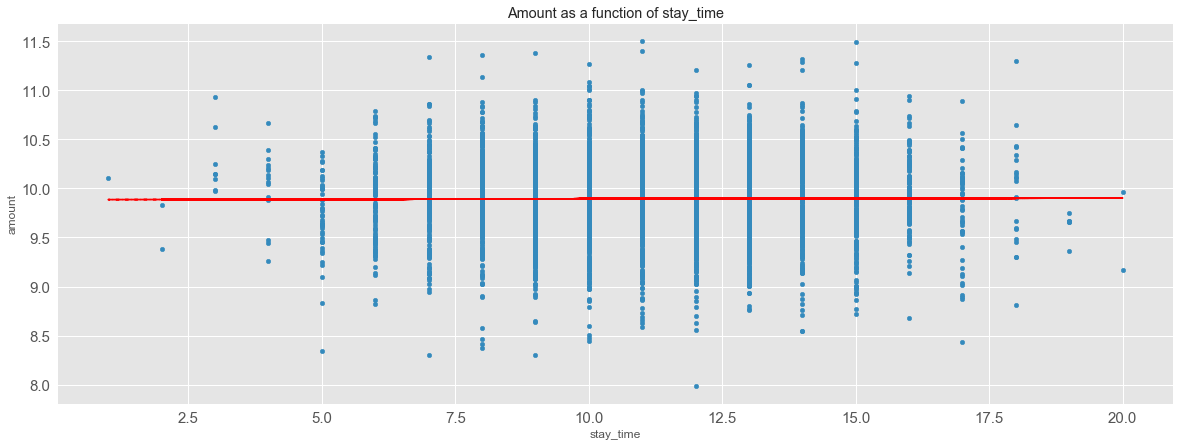

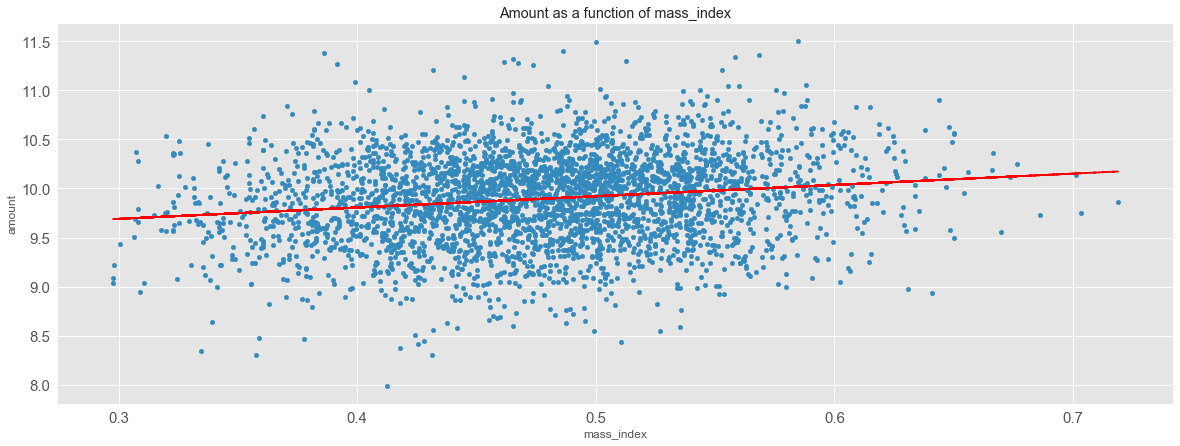

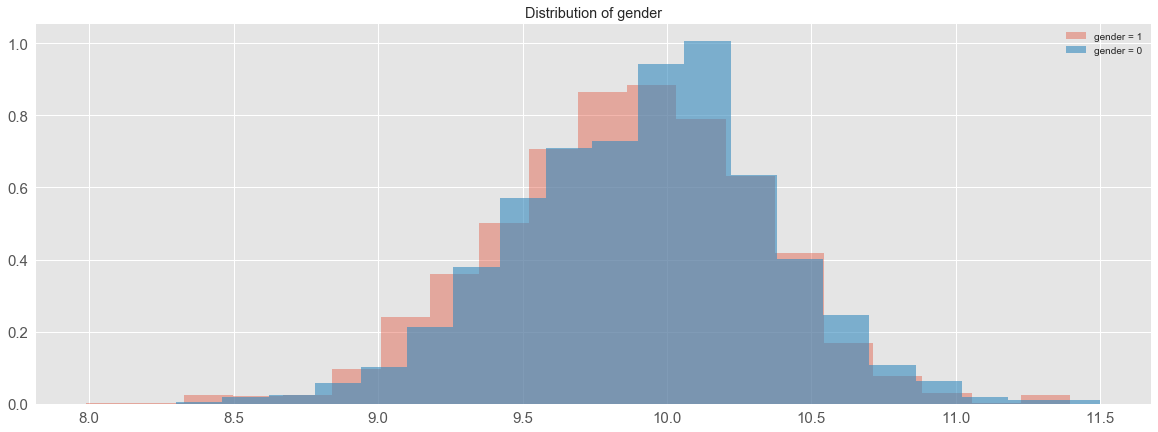

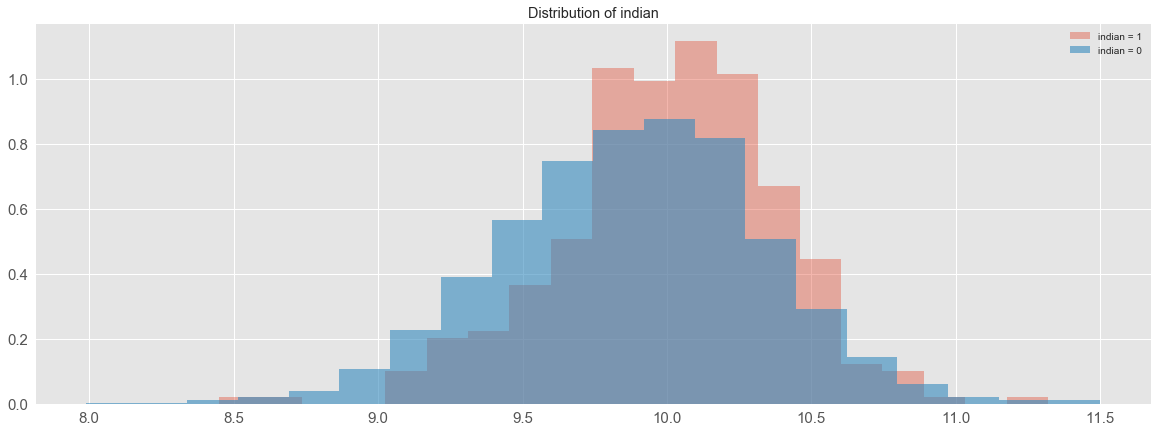

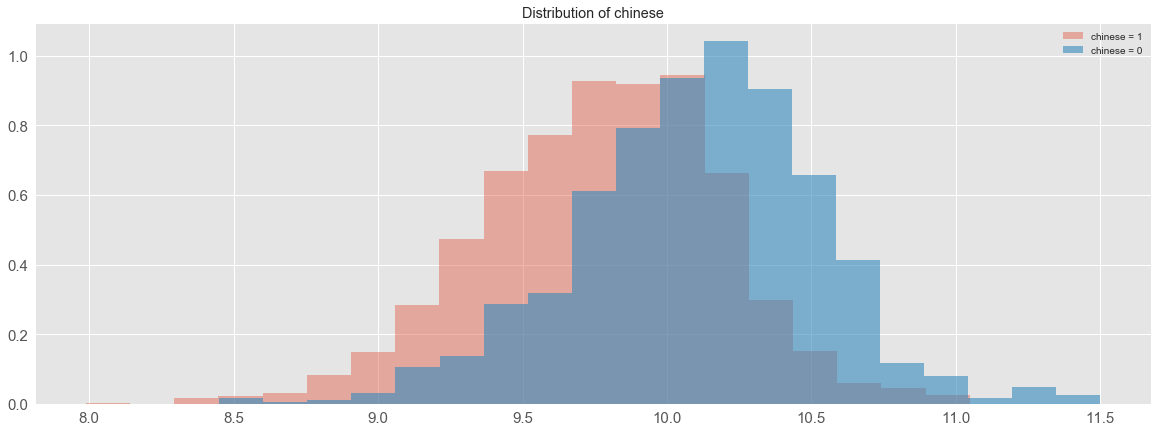

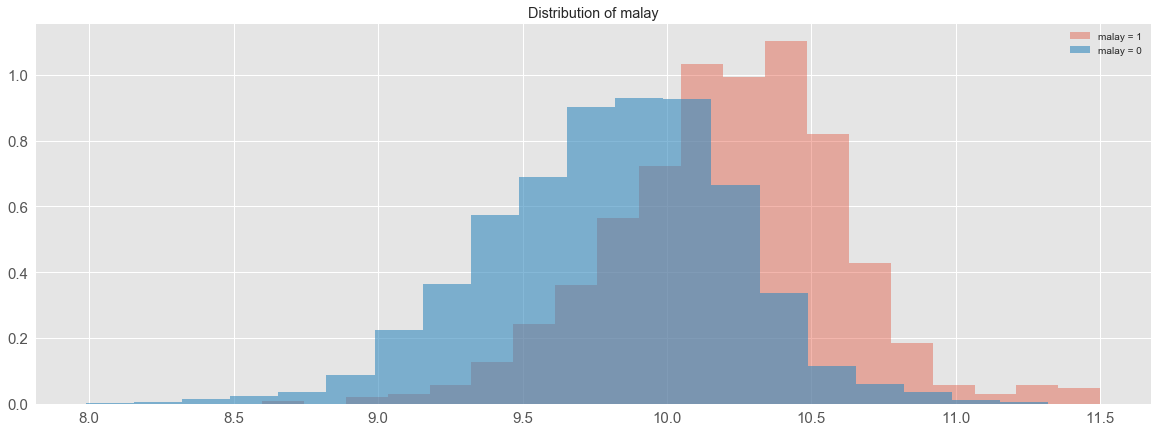

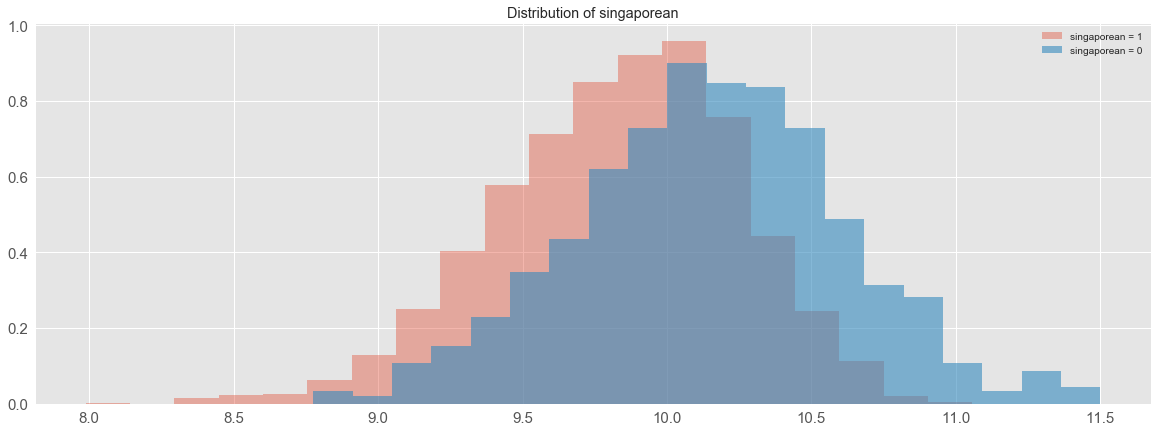

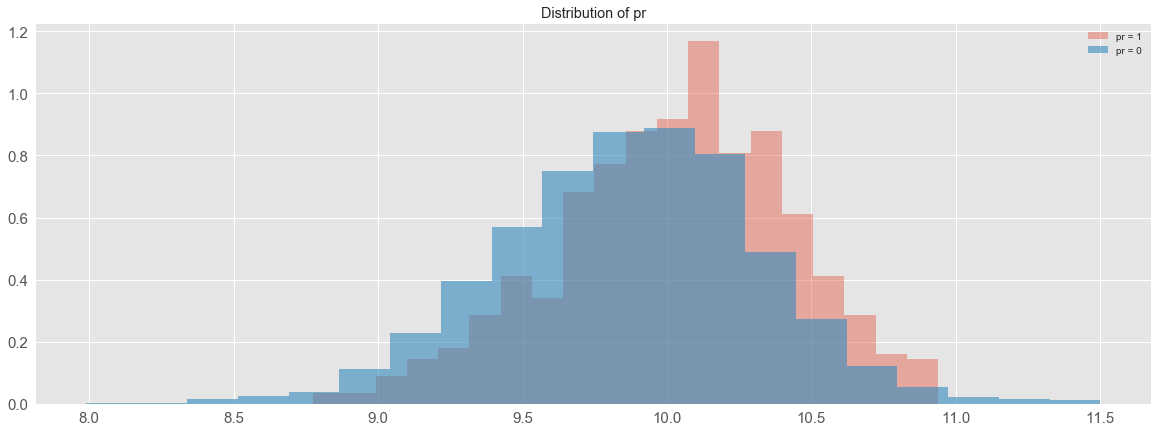

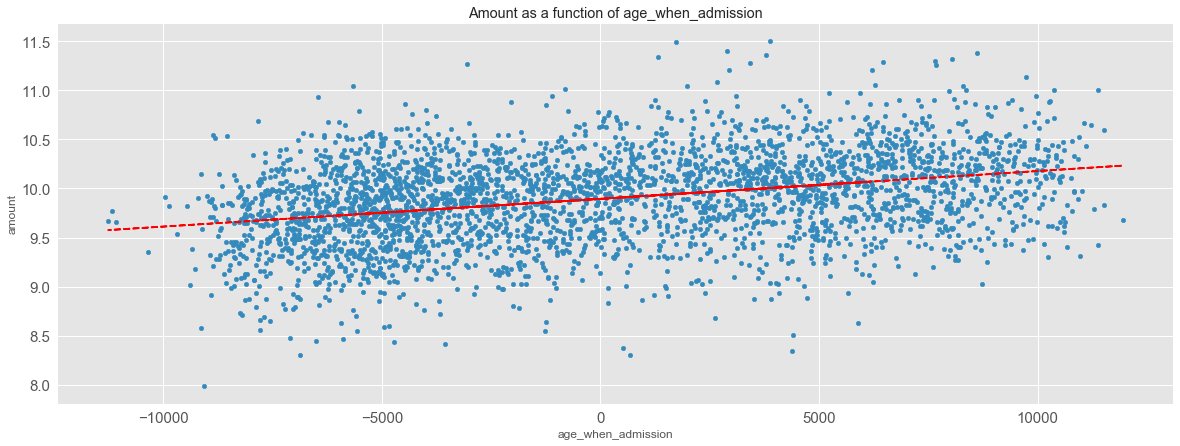

In [70]:
set_options()
for c in clinic_demo_bill.columns:
    if c not in ['id', 'date_of_admission', 'date_of_discharge', 'amount', 'patient_id', 'date_of_birth']:
        fig, ax = plt.subplots(figsize=(20,7))
        if clinic_demo_bill[c].nunique() == 2:
            x = clinic_demo_bill[clinic_demo_bill[c] == 1]['amount'].values
            y = clinic_demo_bill[clinic_demo_bill[c] == 0]['amount'].values
            bins = 20

            plt.hist(x, bins, alpha=0.4, label='%s = 1' %c, normed=True)
            plt.hist(y, bins, alpha=0.6, label='%s = 0' %c, normed=True)
            plt.legend(loc='upper right')
            plt.title('Distribution of %s' %c)
            plt.show()
        else:
            
            clinic_demo_bill.plot(x=c, y='amount', kind = 'scatter', ax = ax)
            plt.title('Amount as a function of %s' %c)
            model = sm.OLS(clinic_demo_bill['amount'],add_constant(clinic_demo_bill[c]))
            results = model.fit()
            plt.plot(clinic_demo_bill[c],results.predict(), "r--")
            plt.show()

## Linear regression without feature engineering as a start

In [71]:
# as we dont see a trend in data but we see some seasonality, let's add month of admission as a feature

In [72]:
clinic_demo_bill['month'] = clinic_demo_bill['date_of_admission'].map(lambda x: x.month)

In [73]:
for c in np.sort(clinic_demo_bill['month'].unique()):
    clinic_demo_bill['month_' + str(c)] = (clinic_demo_bill['month'] == c)*1
clinic_demo_bill.drop(['month'], axis = 1, inplace = True)

In [74]:
cols = [ 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height',
       'stay_time', 'mass_index', 'gender', 'indian', 'chinese',
       'malay', 'singaporean', 'pr',
       'age_when_admission', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11']

In [75]:
#### check VIF values and get rid of them

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [77]:
features = "+".join(cols)

In [78]:
y, X = dmatrices('amount ~' + features, clinic_demo_bill, return_type='dataframe')

In [79]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [80]:
vif[(vif['VIF Factor'] > 10) & (vif['features'] != 'Intercept')].head(10)

VIF Factor    features
22  642.892827      weight
23   61.034605      height
25  596.365870  mass_index

In [81]:
check_cols = list(vif[(vif['VIF Factor'] > 10) & (vif['features'] != 'Intercept')]['features'].values)
check_cols.append('amount')

In [82]:
clinic_demo_bill[check_cols].corr()

weight    height  mass_index    amount
weight      1.000000  0.270154    0.951949  0.167449
height      0.270154  1.000000   -0.035011  0.029239
mass_index  0.951949 -0.035011    1.000000  0.165418
amount      0.167449  0.029239    0.165418  1.000000

In [83]:
# we exclude weight from our features

In [84]:
clinic_demo_bill.drop('weight', axis = 1, inplace = True)

In [85]:
# start modeling

In [87]:
cols = [ 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'height',
       'stay_time', 'mass_index', 'gender', 'indian', 'chinese',
       'malay', 'singaporean', 'pr',
       'age_when_admission', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11']

In [88]:
X = clinic_demo_bill[cols]
y = clinic_demo_bill['amount']

model = sm.OLS(y,add_constant(X))

results = model.fit()

In [89]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3001.
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:45:09   Log-Likelihood:                 4123.8
No. Observations:                3400   AIC:                            -8162.
Df Residuals:                    3357   BIC:                            -7898.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.8506      0.053    168.140      0.000       8.747       8.954
medical_history_1      0.2755      0.003     82.686      0.000       0.269       0.282
medical_history_2      0.0183      0.003      6.672      0.000       0.013       0.024
medical_history_3      0.0312      0.004      8.572      0.000       0.024       0.038
medical_history_4      0.0085      0.006      1.507      0.132      -0.003       0.020
medical_history_5      0.0593      0.005     11.137      0.000       0.049       0.070
medical_history_6      0.1703      0.003     59.425      0.000       0.165       0.176
medical_history_7      0.0437      0.003     15.246      0.000       0.038       0.049
preop_medication_1     0.0206      0.003      8.216      0.000       0.016       0.025
preop_medication_2     0.0153      0.003      6.011      0.000       0.010       0.020
preop_medication_3     0.0278      0.003      8.525      0.000       0.021       0.034
preop_medication_4     0.0016      0.003      0.656      0.512      -0.003       0.007
preop_medication_5     0.0169      0.003      5.199      0.000       0.011       0.023
preop_medication_6     0.0238      0.003      8.320      0.000       0.018       0.029
symptom_1              0.1359      0.003     52.872      0.000       0.131       0.141
symptom_2              0.1864      0.003     70.485      0.000       0.181       0.192
symptom_3              0.2012      0.003     80.141      0.000       0.196       0.206
symptom_4              0.1737      0.003     62.048      0.000       0.168       0.179
symptom_5              0.5093      0.003    203.635      0.000       0.504       0.514
lab_result_1       -4.452e-05      0.001     -0.062      0.950      -0.001       0.001
lab_result_2           0.0002      0.001      0.478      0.633      -0.001       0.001
lab_result_3           0.0001   8.19e-05      1.433      0.152   -4.33e-05       0.000
height                 0.0015      0.000      5.754      0.000       0.001       0.002
stay_time             -0.0008      0.000     -1.862      0.063      -0.002    4.35e-05
mass_index             1.0503      0.020     51.793      0.000       1.011       1.090
gender                -0.0043      0.004     -1.157      0.247      -0.012       0.003
indian                 0.0928      0.007     13.916      0.000       0.080       0.106
chinese               -0.1008      0.006    -17.950      0.000      -0.112      -0.090
malay                  0.3425      0.006     56.700      0.000       0.331       0.354
singaporean           -0.6924      0.006   -116.929      0.000      -0.704      -0.681
pr                    -0.5090      0.007    -77.191      0.000      -0.522      -0.496
age_when_admission  2.676e-05   2.33e-07    114.780      0.000    2.63e-05    2.72e-05
month_1                0.0093      0.0

In [90]:
# check how our model fits along age values

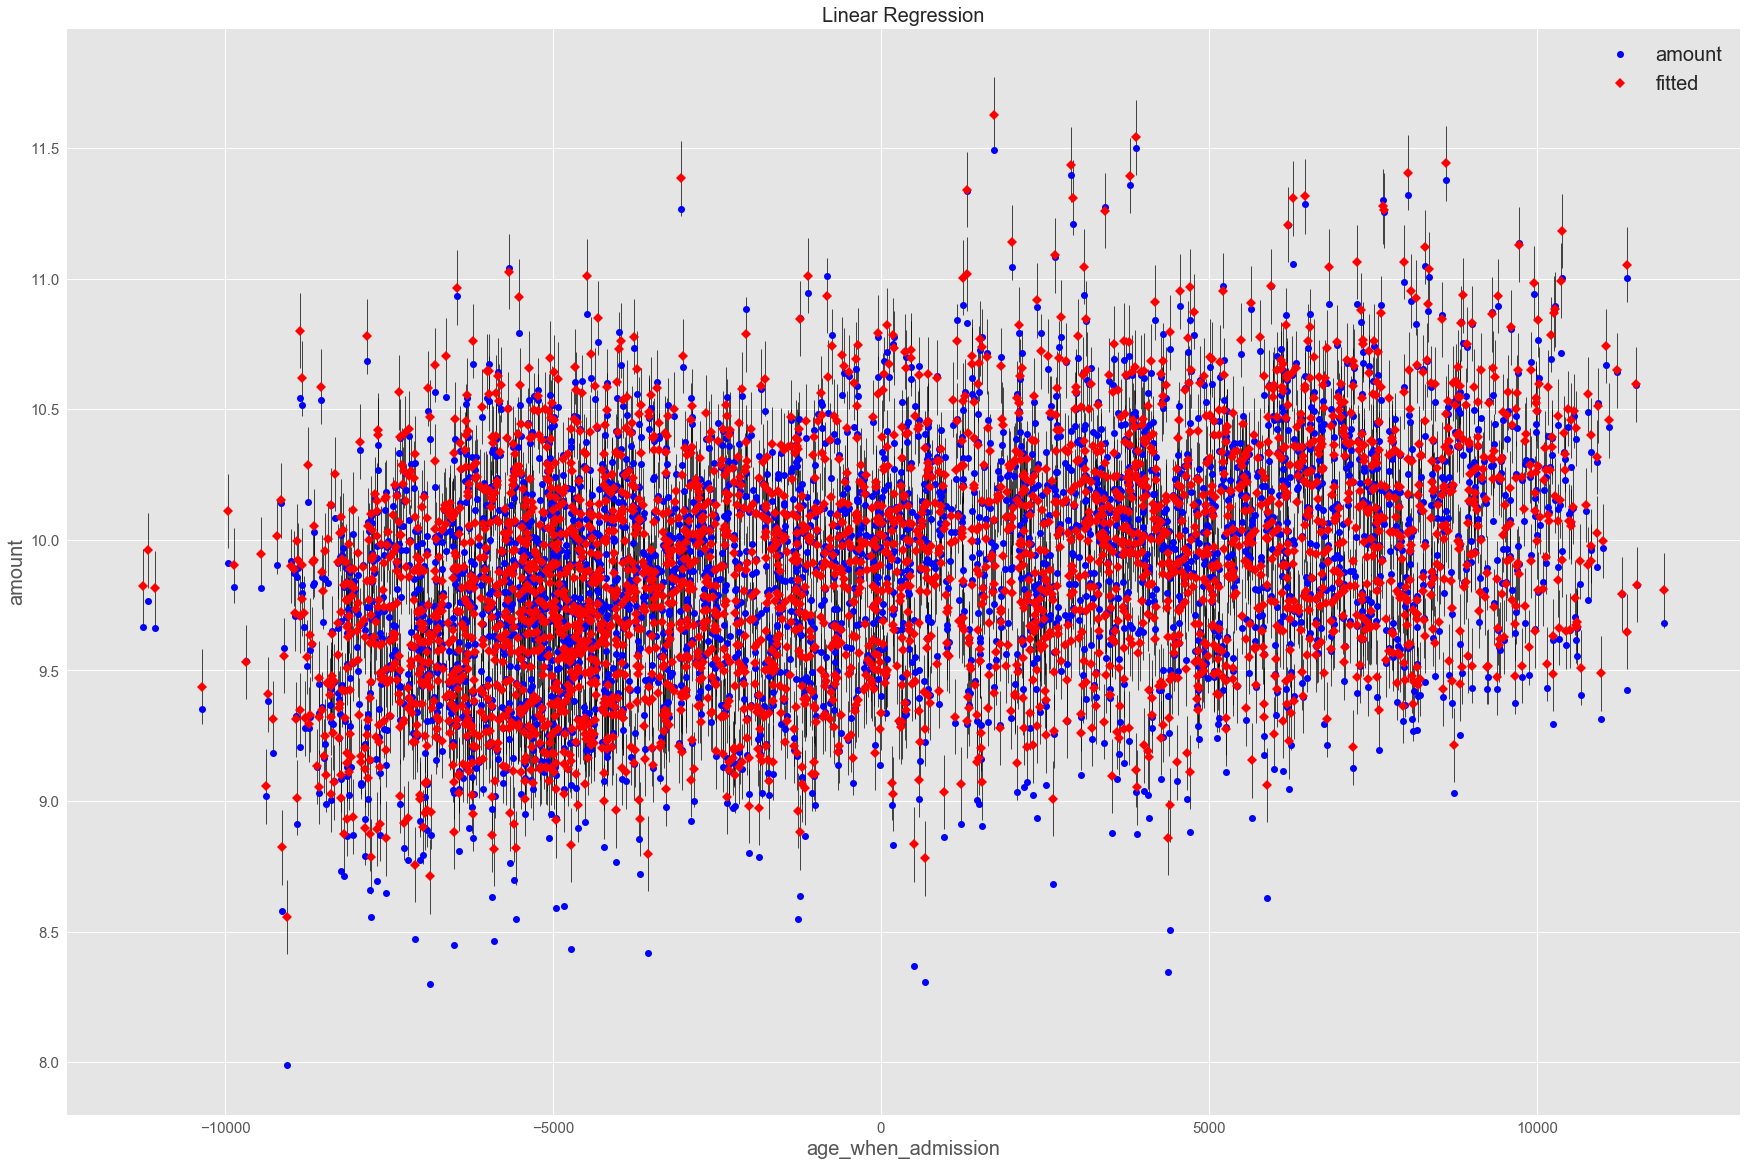

In [91]:
fig, ax = plt.subplots(figsize=(30,20))
fig = sm.graphics.plot_fit(results, 'age_when_admission', ax=ax)
ax.set_ylabel("amount", fontsize = 20)
ax.set_xlabel("age_when_admission", fontsize = 20)
ax.set_title("Linear Regression", fontsize = 20)
ax.legend(fontsize = 20)
plt.show()

In [92]:
# For a quick check of all the regressors, we use plot_partregress_grid
# besides p_values of coefficients, we see visually that not all of regressors  are useful for our model

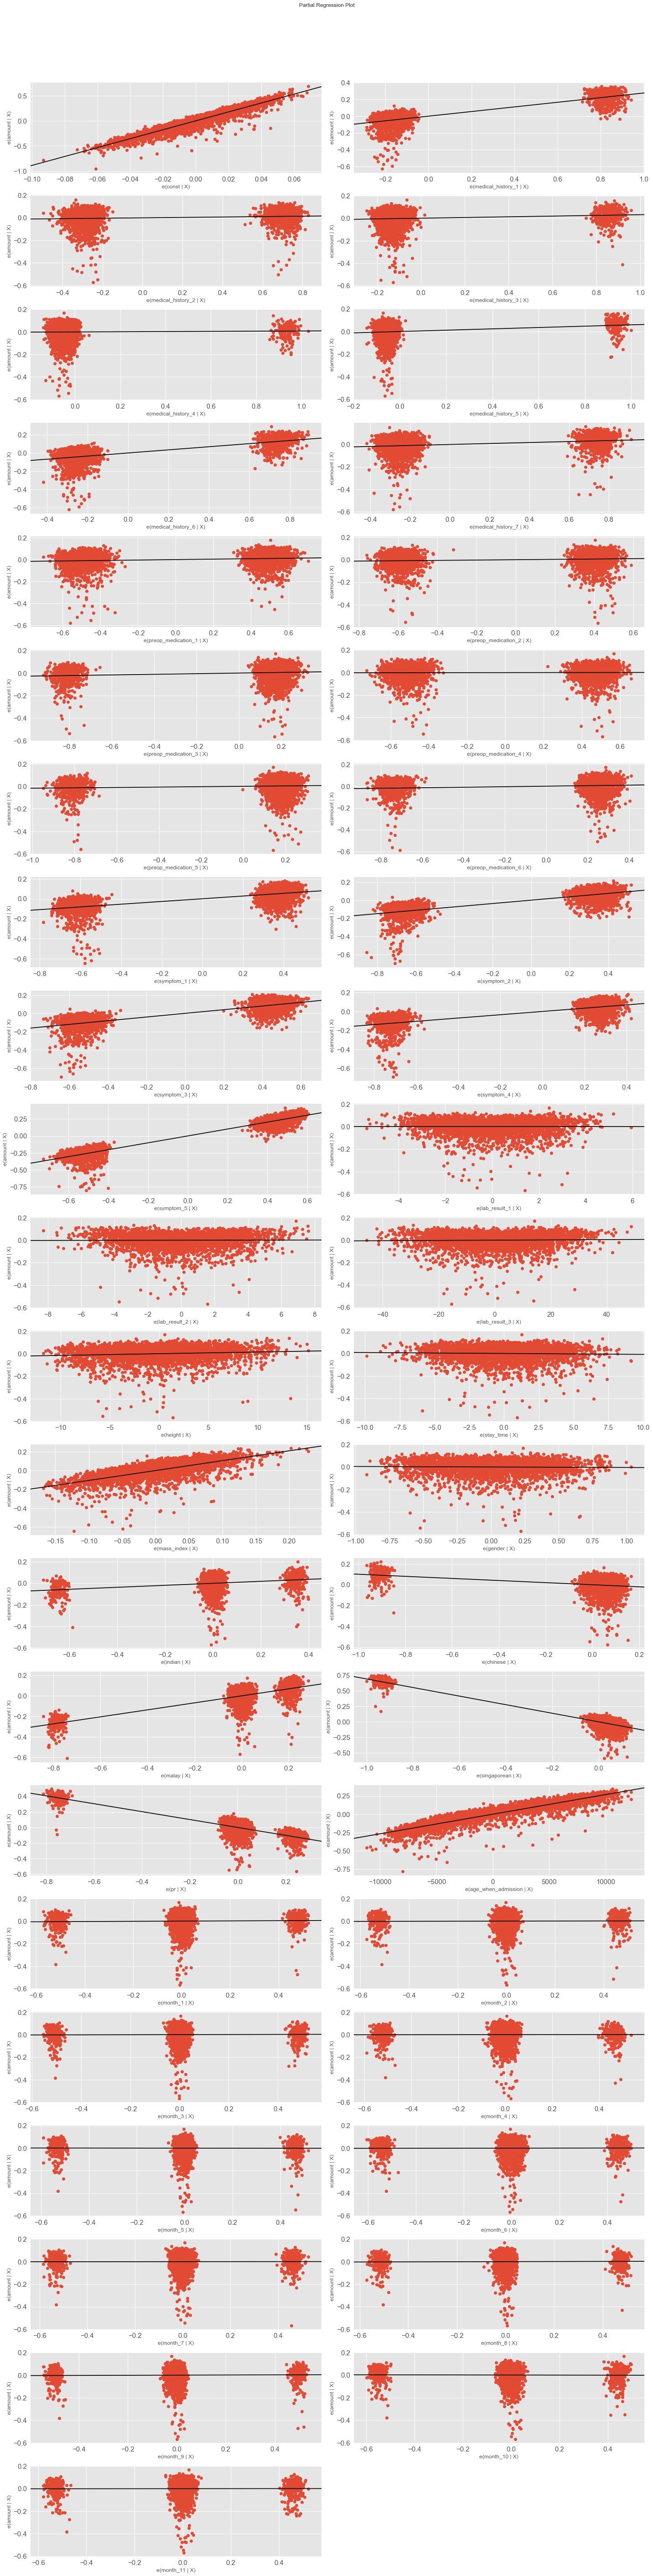

In [93]:
fig = plt.figure(figsize=(20,80))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
plt.show()

In [94]:
# With residuals plot we can see that our model understates costs and has some too extreme predictions

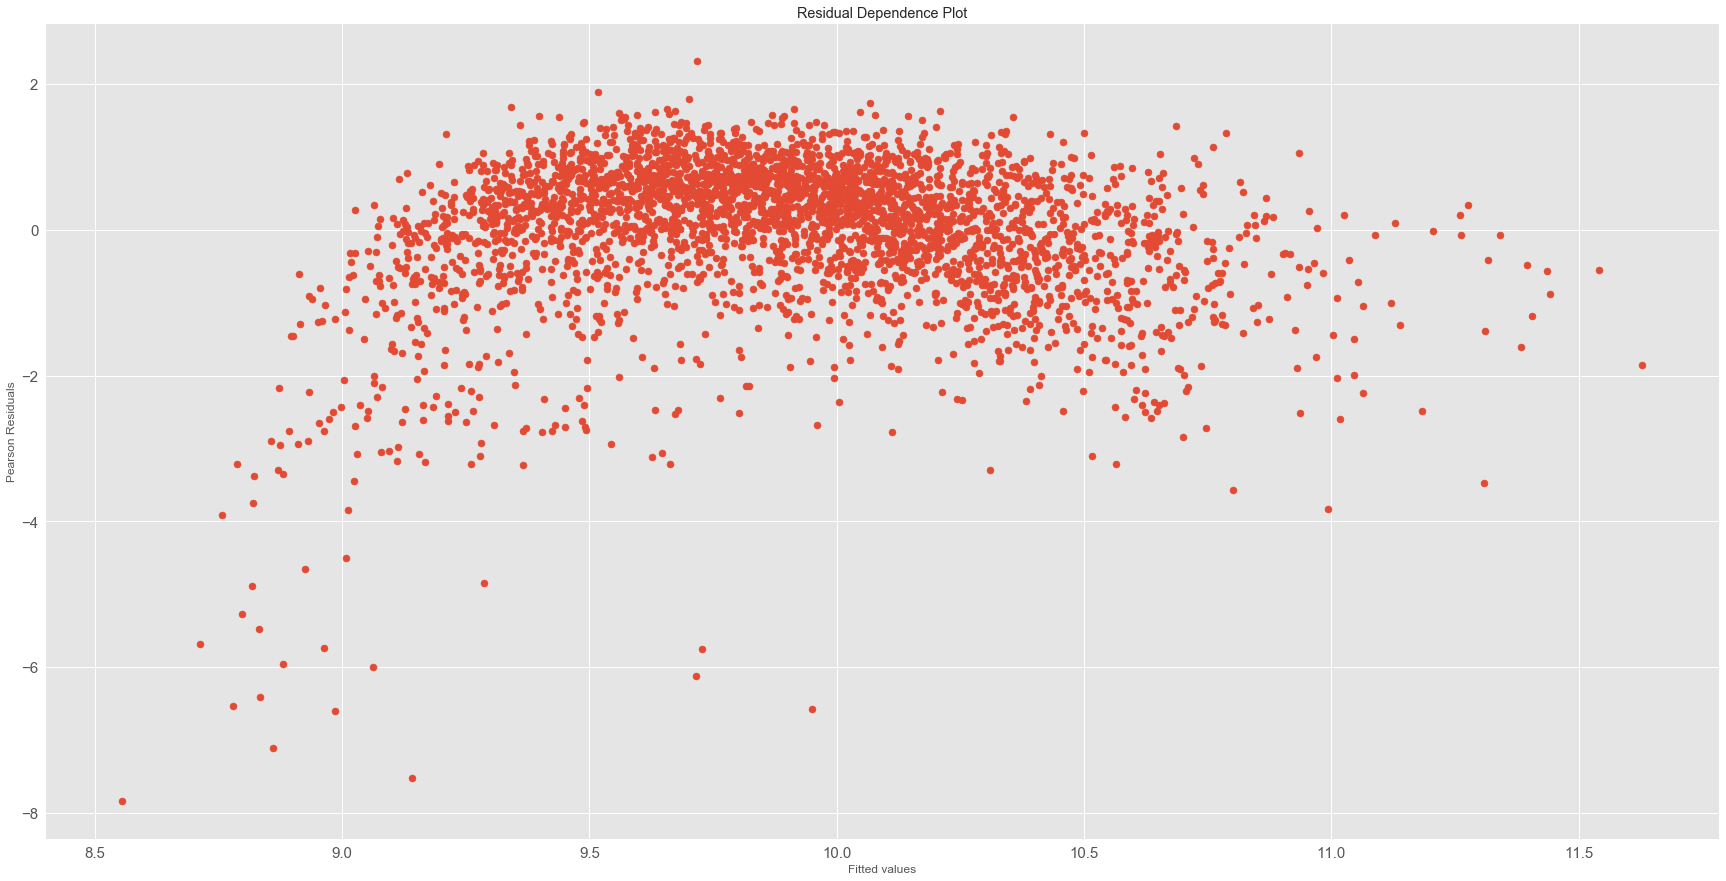

In [95]:
predictions = results.predict()
median = clinic_demo_bill['amount'].median()

fig, ax = plt.subplots(figsize=(30,15))

ax.scatter([p if p > 0 else median for p in predictions ], results.resid_pearson)
# ax.hlines(0, 0, 1)
# ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

In [96]:
# check for MAPE values

In [97]:
def mape(y_true, y_pred): #mean_absolute_percentage_error
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [98]:
predictions = results.predict()

median = clinic_demo_bill['amount'].median()
clinic_demo_bill['amount_predicted'] = [p if p > 0 else median for p in predictions ]


In [99]:
# It looks pretty good

In [100]:
mape(clinic_demo_bill['amount'], clinic_demo_bill['amount_predicted'])

0.005287682454433144

In [101]:
# Mape after back log transformation

In [102]:
mape(np.exp(clinic_demo_bill['amount']), np.exp(clinic_demo_bill['amount_predicted']))

0.0528480618490464

In [103]:
# plot fitted predictions. They look pretty good. We see quite stable residuals

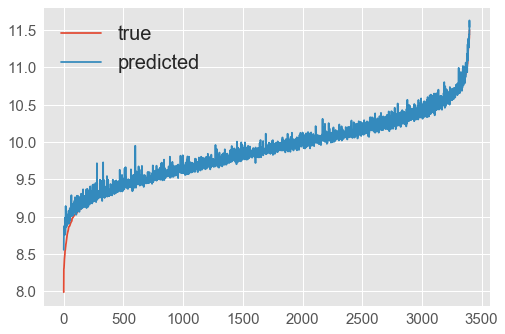

In [104]:
plt.plot(clinic_demo_bill.index, clinic_demo_bill.sort_values(by = 'amount')['amount'])
plt.plot(clinic_demo_bill.index, clinic_demo_bill.sort_values(by = 'amount')['amount_predicted'])

plt.legend(['true', 'predicted'], loc='upper left', fontsize = 20)
plt.show()

In [105]:
# Distribution of residuals looks like normal. That is really good

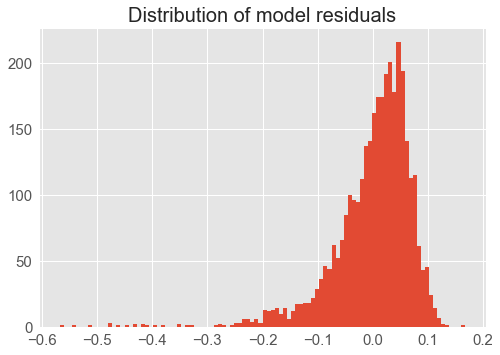

In [106]:
pd.Series(results.resid).hist(bins = 100)
plt.title("Distribution of model residuals", fontsize = 20)
plt.show()

In [107]:
# try to exclude otliers

In [108]:
std = clinic_demo_bill['amount'].std()
mean = clinic_demo_bill['amount'].mean()

X = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std][cols]
y = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std]['amount']

model = sm.OLS(y,add_constant(X))

results = model.fit()

In [109]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     3202.
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:45:17   Log-Likelihood:                 4342.4
No. Observations:                3375   AIC:                            -8599.
Df Residuals:                    3332   BIC:                            -8336.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.8799      0.049    180.856      0.000       8.784       8.976
medical_history_1      0.2738      0.003     88.036      0.000       0.268       0.280
medical_history_2      0.0193      0.003      7.540      0.000       0.014       0.024
medical_history_3      0.0295      0.003      8.717      0.000       0.023       0.036
medical_history_4      0.0063      0.005      1.194      0.233      -0.004       0.017
medical_history_5      0.0597      0.005     12.002      0.000       0.050       0.069
medical_history_6      0.1679      0.003     62.874      0.000       0.163       0.173
medical_history_7      0.0452      0.003     16.870      0.000       0.040       0.050
preop_medication_1     0.0192      0.002      8.236      0.000       0.015       0.024
preop_medication_2     0.0158      0.002      6.669      0.000       0.011       0.020
preop_medication_3     0.0255      0.003      8.380      0.000       0.020       0.031
preop_medication_4     0.0012      0.002      0.498      0.619      -0.003       0.006
preop_medication_5     0.0168      0.003      5.545      0.000       0.011       0.023
preop_medication_6     0.0236      0.003      8.840      0.000       0.018       0.029
symptom_1              0.1323      0.002     55.191      0.000       0.128       0.137
symptom_2              0.1813      0.002     73.348      0.000       0.176       0.186
symptom_3              0.1975      0.002     84.274      0.000       0.193       0.202
symptom_4              0.1680      0.003     64.149      0.000       0.163       0.173
symptom_5              0.5063      0.002    217.147      0.000       0.502       0.511
lab_result_1           0.0004      0.001      0.594      0.553      -0.001       0.002
lab_result_2           0.0003      0.000      0.618      0.537      -0.001       0.001
lab_result_3        6.732e-05   7.63e-05      0.882      0.378   -8.23e-05       0.000
height                 0.0015      0.000      6.179      0.000       0.001       0.002
stay_time             -0.0010      0.000     -2.473      0.013      -0.002      -0.000
mass_index             1.0289      0.019     54.359      0.000       0.992       1.066
gender                -0.0034      0.003     -0.995      0.320      -0.010       0.003
indian                 0.0931      0.006     14.985      0.000       0.081       0.105
chinese               -0.1001      0.005    -19.144      0.000      -0.110      -0.090
malay                  0.3415      0.006     60.639      0.000       0.330       0.353
singaporean           -0.6933      0.006   -121.305      0.000      -0.705      -0.682
pr                    -0.5119      0.006    -81.006      0.000      -0.524      -0.500
age_when_admission  2.661e-05   2.17e-07    122.443      0.000    2.62e-05     2.7e-05
month_1                0.0082      0.0

In [110]:
# After excluding outliers we see that our residuals plot looks better and MAPE decreased

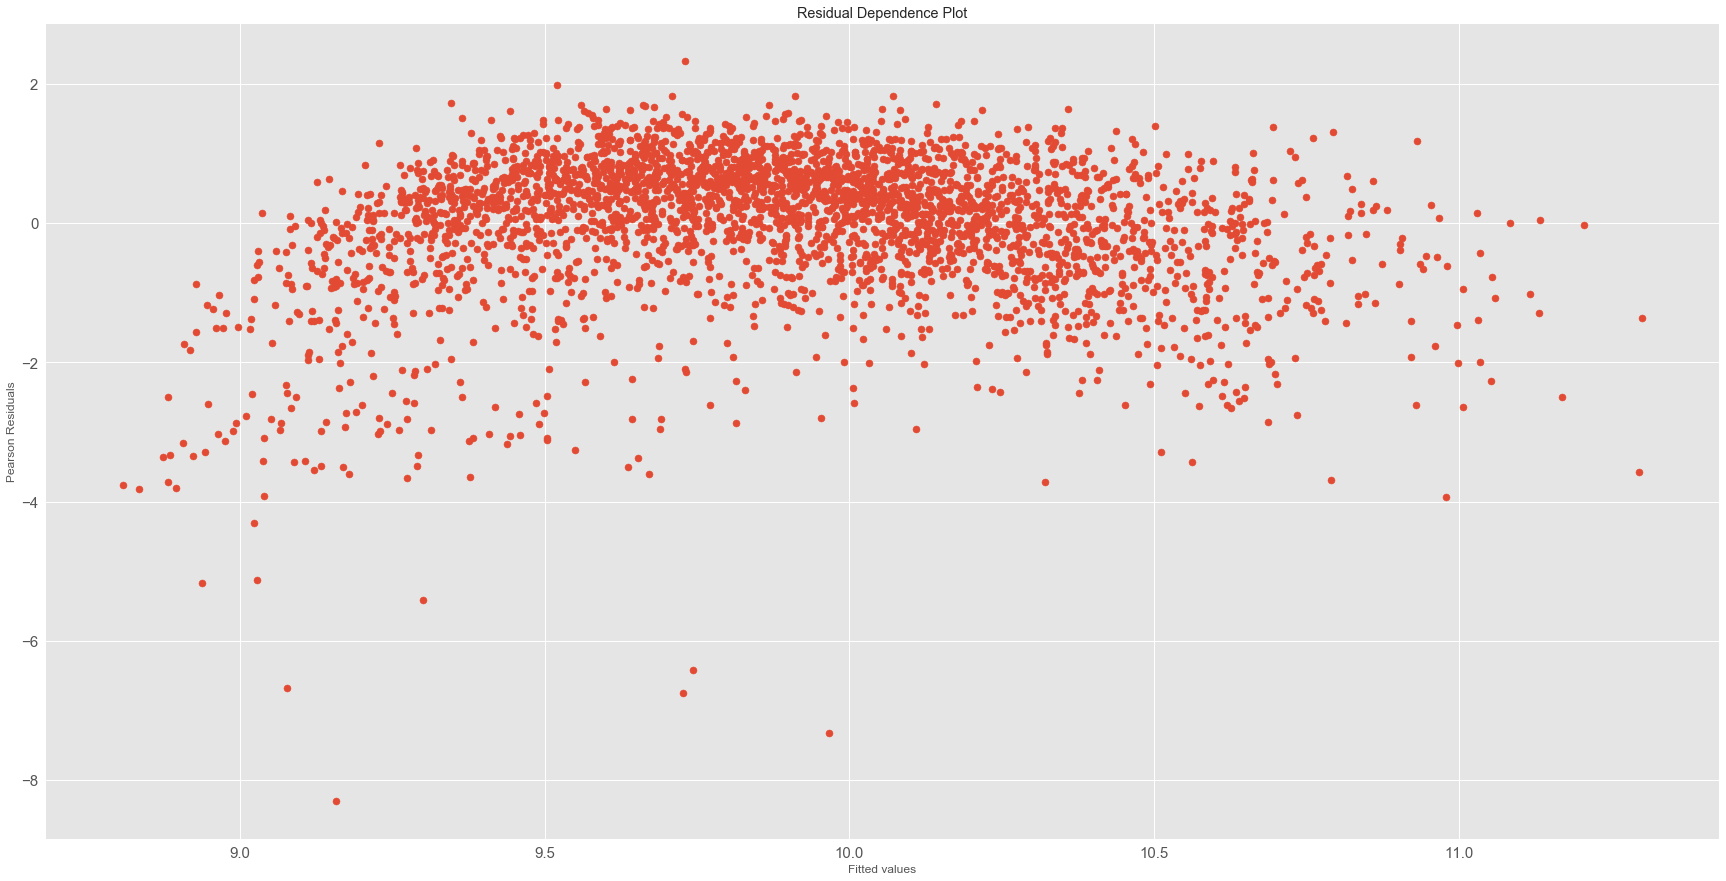

In [111]:
predictions = results.predict()
median = np.median(y)

fig, ax = plt.subplots(figsize=(30,15))

ax.scatter([p if p > 0 else median for p in predictions ], results.resid_pearson)
# ax.hlines(0, 0, 1)
# ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

In [112]:
mape(np.exp(y), np.exp([p if p > 0 else median for p in predictions ]))

0.05012424632920561

In [113]:
X = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std][cols].values
y = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std]['amount'].values

In [114]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

seeds = [10, 500, 1000] # устредним так же по разбиению выборки
scores = []
kfold = 10
rqs = []
mapes = []

X = add_constant(X)

for seed in seeds:
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=False)
    
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train)
        result = model.fit()
        predictions = result.predict(X_valid)
        median =np.median(X_train)
        predictions = [p if p > 0 else median for p in predictions ]
        
        r2 = r2_score(np.exp(y_valid), np.exp(predictions))
        mapev = mape(np.exp(y_valid), np.exp(predictions))
        rqs.append(r2)
        mapes.append(mapev)
        
        print('R2 after back transformation:', r2, 'MAPE  after back transformation:', mapev)

    print('Seed %s completed' % seed)

print('R squared mean  after back transformation value among folds and seeds %s with standard deviation %s' % (np.mean(rqs), np.std(rqs)))
print('MAPE mean value  after back transformation among folds and seeds %s with standard deviation %s' % (np.mean(mapes), np.std(mapes)))

 xgb kfold: 1  of  10 : 
R2 after back transformation: 0.981964846958 MAPE  after back transformation: 0.0493658693202
 xgb kfold: 2  of  10 : 
R2 after back transformation: 0.977077591729 MAPE  after back transformation: 0.0500507974587
 xgb kfold: 3  of  10 : 
R2 after back transformation: 0.975069951982 MAPE  after back transformation: 0.0548200034056
 xgb kfold: 4  of  10 : 
R2 after back transformation: 0.967887289342 MAPE  after back transformation: 0.051877212108
 xgb kfold: 5  of  10 : 
R2 after back transformation: 0.965163992981 MAPE  after back transformation: 0.049785115943
 xgb kfold: 6  of  10 : 
R2 after back transformation: 0.969091856315 MAPE  after back transformation: 0.0549766840321
 xgb kfold: 7  of  10 : 
R2 after back transformation: 0.97467136926 MAPE  after back transformation: 0.0479697112292
 xgb kfold: 8  of  10 : 
R2 after back transformation: 0.97016369179 MAPE  after back transformation: 0.050877659497
 xgb kfold: 9  of  10 : 
R2 after back transformation

# Keep initial dataset without outliers to get more robust model

In [115]:
std = clinic_demo_bill['amount'].std()
mean = clinic_demo_bill['amount'].mean()

clinic_demo_bill = clinic_demo_bill[abs(clinic_demo_bill['amount'] - mean) <= 3*std]

## Exclude nonsignificant features

In [116]:
# eliminate features with low p_values

In [117]:
cols_stay = []
for k, v  in results.pvalues.items():
    if v <= 0.5 and k != 'const':
        cols_stay.append(k)

In [118]:
cols_stay

['medical_history_1',
 'medical_history_2',
 'medical_history_3',
 'medical_history_4',
 'medical_history_5',
 'medical_history_6',
 'medical_history_7',
 'preop_medication_1',
 'preop_medication_2',
 'preop_medication_3',
 'preop_medication_5',
 'preop_medication_6',
 'symptom_1',
 'symptom_2',
 'symptom_3',
 'symptom_4',
 'symptom_5',
 'lab_result_3',
 'height',
 'stay_time',
 'mass_index',
 'gender',
 'indian',
 'chinese',
 'malay',
 'singaporean',
 'pr',
 'age_when_admission',
 'month_1',
 'month_9',
 'month_10']

In [119]:
X = clinic_demo_bill[cols_stay]
y = clinic_demo_bill['amount']

In [121]:
model = sm.OLS(y,add_constant(X))

In [122]:
results = model.fit()

In [123]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4349.
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:45:18   Log-Likelihood:                 4340.8
No. Observations:                3375   AIC:                            -8618.
Df Residuals:                    3343   BIC:                            -8422.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.8940      0.046    192.969      0.000       8.804       8.984
medical_history_1      0.2740      0.003     88.317      0.000       0.268       0.280
medical_history_2      0.0194      0.003      7.586      0.000       0.014       0.024
medical_history_3      0.0294      0.003      8.716      0.000       0.023       0.036
medical_history_4      0.0065      0.005      1.253      0.210      -0.004       0.017
medical_history_5      0.0598      0.005     12.061      0.000       0.050       0.070
medical_history_6      0.1679      0.003     63.020      0.000       0.163       0.173
medical_history_7      0.0452      0.003     16.933      0.000       0.040       0.050
preop_medication_1     0.0193      0.002      8.290      0.000       0.015       0.024
preop_medication_2     0.0158      0.002      6.671      0.000       0.011       0.020
preop_medication_3     0.0255      0.003      8.403      0.000       0.020       0.031
preop_medication_5     0.0168      0.003      5.562      0.000       0.011       0.023
preop_medication_6     0.0237      0.003      8.882      0.000       0.018       0.029
symptom_1              0.1323      0.002     55.293      0.000       0.128       0.137
symptom_2              0.1812      0.002     73.564      0.000       0.176       0.186
symptom_3              0.1975      0.002     84.485      0.000       0.193       0.202
symptom_4              0.1680      0.003     64.324      0.000       0.163       0.173
symptom_5              0.5063      0.002    217.738      0.000       0.502       0.511
lab_result_3        6.642e-05   7.61e-05      0.873      0.383   -8.27e-05       0.000
height                 0.0015      0.000      6.236      0.000       0.001       0.002
stay_time             -0.0010      0.000     -2.512      0.012      -0.002      -0.000
mass_index             1.0287      0.019     54.477      0.000       0.992       1.066
gender                -0.0032      0.003     -0.933      0.351      -0.010       0.004
indian                 0.0931      0.006     15.029      0.000       0.081       0.105
chinese               -0.1003      0.005    -19.227      0.000      -0.111      -0.090
malay                  0.3415      0.006     60.766      0.000       0.331       0.353
singaporean           -0.6934      0.006   -121.722      0.000      -0.705      -0.682
pr                    -0.5121      0.006    -81.369      0.000      -0.524      -0.500
age_when_admission  2.661e-05   2.16e-07    122.928      0.000    2.62e-05     2.7e-05
month_1                0.0073      0.004      1.695      0.090      -0.001       0.016
month_9                0.0067      0.004      1.511      0.131      -0.002       0.016
month_10              -0.0053      0.004     -1.302      0.193      -0.013       0.003
======================================

## After excluding features with low significance we decreased AIC level and slightly improved MAPE

In [124]:
predictions = results.predict()

median = clinic_demo_bill['amount'].median()
clinic_demo_bill['amount_predicted'] = [p if p > 0 else median for p in predictions ]

In [125]:
mape(clinic_demo_bill['amount'], clinic_demo_bill['amount_predicted'])

0.005020472626289597

In [126]:
# MAPE after back log transformation

In [127]:
mape(np.exp(clinic_demo_bill['amount']), np.exp(clinic_demo_bill['amount_predicted']))

0.050119766177066864

In [128]:
# plot predictions. THey look pretty good

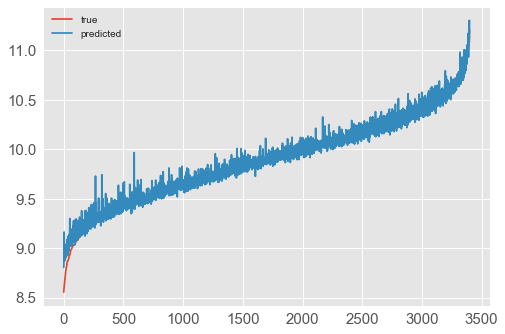

In [129]:
plt.plot(clinic_demo_bill.index, clinic_demo_bill.sort_values(by = 'amount')['amount'])
plt.plot(clinic_demo_bill.index, clinic_demo_bill.sort_values(by = 'amount')['amount_predicted'])

plt.legend(['true', 'predicted'], loc='upper left')
plt.show()

In [130]:
X = clinic_demo_bill[cols_stay].values
y = clinic_demo_bill['amount'].values

seeds = [10, 500, 1000] # устредним так же по разбиению выборки
scores = []
kfold = 10
rqs = []
mapes = []

X = add_constant(X)

for seed in seeds:
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=False)
    
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train)
        result = model.fit()
        predictions = result.predict(X_valid)
        median =np.median(X_train)
        predictions = [p if p > 0 else median for p in predictions ]
        
        r2 = r2_score(np.exp(y_valid), np.exp(predictions))
        mapev = mape(np.exp(y_valid), np.exp(predictions))
        rqs.append(r2)
        mapes.append(mapev)
        
        print('R2 after back transformation:', r2, 'MAPE  after back transformation:', mapev)

    print('Seed %s completed' % seed)

print('R squared mean  after back transformation value among folds and seeds %s with standard deviation %s' % (np.mean(rqs), np.std(rqs)))
print('MAPE mean value  after back transformation among folds and seeds %s with standard deviation %s' % (np.mean(mapes), np.std(mapes)))

 xgb kfold: 1  of  10 : 
R2 after back transformation: 0.982189563354 MAPE  after back transformation: 0.0490556614129
 xgb kfold: 2  of  10 : 
R2 after back transformation: 0.977153811881 MAPE  after back transformation: 0.0499044433088
 xgb kfold: 3  of  10 : 
R2 after back transformation: 0.975435703221 MAPE  after back transformation: 0.0543813885731
 xgb kfold: 4  of  10 : 
R2 after back transformation: 0.968151536933 MAPE  after back transformation: 0.0517149331329
 xgb kfold: 5  of  10 : 
R2 after back transformation: 0.9653052335 MAPE  after back transformation: 0.0498237807565
 xgb kfold: 6  of  10 : 
R2 after back transformation: 0.968985144691 MAPE  after back transformation: 0.0550052765155
 xgb kfold: 7  of  10 : 
R2 after back transformation: 0.974749171066 MAPE  after back transformation: 0.0480328717933
 xgb kfold: 8  of  10 : 
R2 after back transformation: 0.970222378492 MAPE  after back transformation: 0.0506709155578
 xgb kfold: 9  of  10 : 
R2 after back transformat

## Check model stability with cross validation

In [131]:
# let's check model quality with KFold cross-validation among different seeds

In [132]:
X = clinic_demo_bill[cols_stay].values
y = clinic_demo_bill['amount'].values

In [133]:
seeds = [10, 500, 1000] # устредним так же по разбиению выборки
scores = []
kfold = 10
rqs = []
mapes = []

X = add_constant(X)

for seed in seeds:
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=False)
    
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train)
        result = model.fit()
        predictions = result.predict(X_valid)
        median =np.median(X_train)
        predictions = [p if p > 0 else median for p in predictions ]
        
        r2 = r2_score(np.exp(y_valid), np.exp(predictions))
        mapev = mape(np.exp(y_valid), np.exp(predictions))
        rqs.append(r2)
        mapes.append(mapev)
        
        print('R2 after back transformation:', r2, 'MAPE  after back transformation:', mapev)

    print('Seed %s completed' % seed)

 xgb kfold: 1  of  10 : 
R2 after back transformation: 0.982189563354 MAPE  after back transformation: 0.0490556614129
 xgb kfold: 2  of  10 : 
R2 after back transformation: 0.977153811881 MAPE  after back transformation: 0.0499044433088
 xgb kfold: 3  of  10 : 
R2 after back transformation: 0.975435703221 MAPE  after back transformation: 0.0543813885731
 xgb kfold: 4  of  10 : 
R2 after back transformation: 0.968151536933 MAPE  after back transformation: 0.0517149331329
 xgb kfold: 5  of  10 : 
R2 after back transformation: 0.9653052335 MAPE  after back transformation: 0.0498237807565
 xgb kfold: 6  of  10 : 
R2 after back transformation: 0.968985144691 MAPE  after back transformation: 0.0550052765155
 xgb kfold: 7  of  10 : 
R2 after back transformation: 0.974749171066 MAPE  after back transformation: 0.0480328717933
 xgb kfold: 8  of  10 : 
R2 after back transformation: 0.970222378492 MAPE  after back transformation: 0.0506709155578
 xgb kfold: 9  of  10 : 
R2 after back transformat

In [134]:
print('R squared mean  after back transformation value among folds and seeds %s with standard deviation %s' % (np.mean(rqs), np.std(rqs)))

R squared mean  after back transformation value among folds and seeds 0.973209823559 with standard deviation 0.00473749951648


In [135]:
print('MAPE mean value  after back transformation among folds and seeds %s with standard deviation %s' % (np.mean(mapes), np.std(mapes)))

MAPE mean value  after back transformation among folds and seeds 0.0506281061795 with standard deviation 0.00238685963495


## Now it is time for little feature engineering

In [136]:
# let's add feature interactions

In [137]:
cols_interact = ['medical_history_1', 'medical_history_2', 'medical_history_3', 'medical_history_4',
          'medical_history_5', 'medical_history_6', 'medical_history_7', 'preop_medication_1',
          'preop_medication_2', 'preop_medication_3', 'preop_medication_5']
cols_stay_add = [c for c in cols_stay]

import itertools

combinations = [[c[0], c[1]] for c in sorted(set(itertools.combinations(cols_interact,2)))]
for c in combinations:
    clinic_demo_bill[c[0] + '_' + c[1]] = clinic_demo_bill[c[0]]*clinic_demo_bill[c[1]]
    print([c[0], c[1]])
    cols_stay_add.append(c[0] + '_' + c[1])

['medical_history_1', 'medical_history_2']
['medical_history_1', 'medical_history_3']
['medical_history_1', 'medical_history_4']
['medical_history_1', 'medical_history_5']
['medical_history_1', 'medical_history_6']
['medical_history_1', 'medical_history_7']
['medical_history_1', 'preop_medication_1']
['medical_history_1', 'preop_medication_2']
['medical_history_1', 'preop_medication_3']
['medical_history_1', 'preop_medication_5']
['medical_history_2', 'medical_history_3']
['medical_history_2', 'medical_history_4']
['medical_history_2', 'medical_history_5']
['medical_history_2', 'medical_history_6']
['medical_history_2', 'medical_history_7']
['medical_history_2', 'preop_medication_1']
['medical_history_2', 'preop_medication_2']
['medical_history_2', 'preop_medication_3']
['medical_history_2', 'preop_medication_5']
['medical_history_3', 'medical_history_4']
['medical_history_3', 'medical_history_5']
['medical_history_3', 'medical_history_6']
['medical_history_3', 'medical_history_7']
['m

In [138]:
X = clinic_demo_bill[cols_stay_add]
X = add_constant(X)
y = clinic_demo_bill['amount']

In [139]:
import statsmodels.api as sm

In [140]:
model = sm.OLS(y,X)

In [141]:
results_un = model.fit()

In [142]:
results_un.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1592.
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:45:33   Log-Likelihood:                 4393.7
No. Observations:                3375   AIC:                            -8613.
Df Residuals:                    3288   BIC:                            -8081.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     8.8899      0.047    189.224      0.000       8.798       8.982
medical_history_1                         0.3019      0.012     25.871      0.000       0.279       0.325
medical_history_2                         0.0367      0.009      3.897      0.000       0.018       0.055
medical_history_3                         0.0105      0.013      0.810      0.418      -0.015       0.036
medical_history_4                        -0.0234      0.021     -1.136      0.256      -0.064       0.017
medical_history_5                         0.1019      0.019      5.433      0.000       0.065       0.139
medical_history_6                         0.1882      0.010     18.986      0.000       0.169       0.208
medical_history_7                         0.0423      0.010      4.255      0.000       0.023       0.062
preop_medication_1                        0.0149      0.008      1.771      0.077      -0.002       0.031
preop_medication_2                        0.0224      0.008      2.646      0.008       0.006       0.039
preop_medication_3                        0.0209      0.009      2.274      0.023       0.003       0.039
preop_medication_5                        0.0167      0.009      1.813      0.070      -0.001       0.035
preop_medication_6                        0.0232      0.003      8.698      0.000       0.018       0.028
symptom_1                                 0.1321      0.002     55.095      0.000       0.127       0.137
symptom_2                                 0.1820      0.002     73.737      0.000       0.177       0.187
symptom_3                                 0.1975      0.002     84.638      0.000       0.193       0.202
symptom_4                                 0.1680      0.003     64.147      0.000       0.163       0.173
symptom_5                                 0.5064      0.002    217.626      0.000       0.502       0.511
lab_result_3                           6.727e-05    7.6e-05      0.885      0.376   -8.18e-05       0.000
height                                    0.0015      0.000      6.177      0.000       0.001       0.002
stay_time                                -0.0010      0.000     -2.496      0.013      -0.002      -0.000
mass_index                                1.0302      0.019     54.376      0.000       0.993       1.067
gender                                   -0.0035      0.003     -1.021      0.307      -0.010       0.003
indian                                    0.0924      0.006     14.901      0.000       0.080       0.105
chinese                                  -0.1009      0.005    -19.333      0.000      -0.111      -0.091
malay                                     0.3411      0.006     60.644      0.000       0.330       0.352
singapore

In [143]:
for k, v  in results_un.pvalues.items():
    if v <= 0.01 and len(k) > 20:
        cols_stay.append(k)

In [144]:
# try model with these additional interaction features

In [145]:
X = clinic_demo_bill[cols_stay]
X = add_constant(X)

y = clinic_demo_bill['amount']

In [146]:
import statsmodels.api as sm

In [147]:
model = sm.OLS(y,X)

results_un = model.fit()

print('MAPE:', mape(np.exp(clinic_demo_bill['amount']), np.exp(results_un.predict())))

results_un.summary()

MAPE: 0.049964529342703255


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4266.
Date:                Thu, 25 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:45:33   Log-Likelihood:                 4361.9
No. Observations:                3375   AIC:                            -8658.
Df Residuals:                    3342   BIC:                            -8456.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   8.8926      0.046    194.118      0.000       8.803       8.982
medical_history_1                       0.2855      0.004     80.172      0.000       0.279       0.293
medical_history_2                       0.0197      0.003      7.733      0.000       0.015       0.025
medical_history_3                       0.0295      0.003      8.791      0.000       0.023       0.036
medical_history_4                       0.0074      0.005      1.424      0.154      -0.003       0.018
medical_history_5                       0.0596      0.005     12.095      0.000       0.050       0.069
medical_history_6                       0.1755      0.003     60.601      0.000       0.170       0.181
medical_history_7                       0.0445      0.003     16.764      0.000       0.039       0.050
preop_medication_1                      0.0193      0.002      8.345      0.000       0.015       0.024
preop_medication_2                      0.0158      0.002      6.716      0.000       0.011       0.020
preop_medication_3                      0.0252      0.003      8.341      0.000       0.019       0.031
preop_medication_5                      0.0167      0.003      5.560      0.000       0.011       0.023
preop_medication_6                      0.0232      0.003      8.774      0.000       0.018       0.028
symptom_1                               0.1325      0.002     55.706      0.000       0.128       0.137
symptom_2                               0.1816      0.002     74.155      0.000       0.177       0.186
symptom_3                               0.1974      0.002     84.948      0.000       0.193       0.202
symptom_4                               0.1680      0.003     64.723      0.000       0.163       0.173
symptom_5                               0.5064      0.002    219.105      0.000       0.502       0.511
lab_result_3                          6.65e-05   7.56e-05      0.880      0.379   -8.17e-05       0.000
height                                  0.0015      0.000      6.295      0.000       0.001       0.002
stay_time                              -0.0010      0.000     -2.546      0.011      -0.002      -0.000
mass_index                              1.0281      0.019     54.781      0.000       0.991       1.065
gender                                 -0.0031      0.003     -0.911      0.362      -0.010       0.004
indian                                  0.0924      0.006     15.001      0.000       0.080       0.104
chinese                                -0.1009      0.005    -19.459      0.000      -0.111      -0.091
malay                                   0.3406      0.006     60.941      0.000       0.330       0.352
singaporean                            -0.6936      0.006   -122.50

In [148]:
X = clinic_demo_bill[cols_stay].values
X = add_constant(X)

y = clinic_demo_bill['amount'].values

seeds = [10, 500, 1000] # устредним так же по разбиению выборки
scores = []
kfold = 10
rqs = []
mapes = []
for seed in seeds:
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=False)
    

    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train)
        result = model.fit()
        predictions = result.predict(X_valid)
        median =np.median(X_train)
        predictions = [p if p > 0 else median for p in predictions ]
        
        r2 = r2_score(np.exp(y_valid), np.exp(predictions))
        mapev = mape(np.exp(y_valid), np.exp(predictions))
        rqs.append(r2)
        mapes.append(mapev)
        
        print('R2 after back transformation:', r2, 'MAPE  after back transformation:', mapev)

    print('Seed %s completed' % seed)

 xgb kfold: 1  of  10 : 
R2 after back transformation: 0.983068703285 MAPE  after back transformation: 0.0482457050773
 xgb kfold: 2  of  10 : 
R2 after back transformation: 0.976202848409 MAPE  after back transformation: 0.0496880433677
 xgb kfold: 3  of  10 : 
R2 after back transformation: 0.977766135279 MAPE  after back transformation: 0.0539522692557
 xgb kfold: 4  of  10 : 
R2 after back transformation: 0.967797845005 MAPE  after back transformation: 0.0515036490037
 xgb kfold: 5  of  10 : 
R2 after back transformation: 0.967297501877 MAPE  after back transformation: 0.0500792152936
 xgb kfold: 6  of  10 : 
R2 after back transformation: 0.969242454083 MAPE  after back transformation: 0.0553596461594
 xgb kfold: 7  of  10 : 
R2 after back transformation: 0.974251494082 MAPE  after back transformation: 0.0485756791877
 xgb kfold: 8  of  10 : 
R2 after back transformation: 0.972257888375 MAPE  after back transformation: 0.0503440556087
 xgb kfold: 9  of  10 : 
R2 after back transform

In [149]:
print('R squared mean  after back transformation value among folds and seeds %s with standard deviation %s' % (np.mean(rqs), np.std(rqs)))

R squared mean  after back transformation value among folds and seeds 0.973785940681 with standard deviation 0.00460348533285


In [150]:
print('MAPE mean value  after back transformation among folds and seeds %s with standard deviation %s' % (np.mean(mapes), np.std(mapes)))

MAPE mean value  after back transformation among folds and seeds 0.0504853756675 with standard deviation 0.0025115894991


## Prefoming the significance test of restricted and unrestricted models shows the significant difference between two models. Should keep the unrestricted option

In [151]:
results_un.compare_lm_test(restricted = results)

(41.932953096511874, 9.4457280332021635e-11, 1.0)

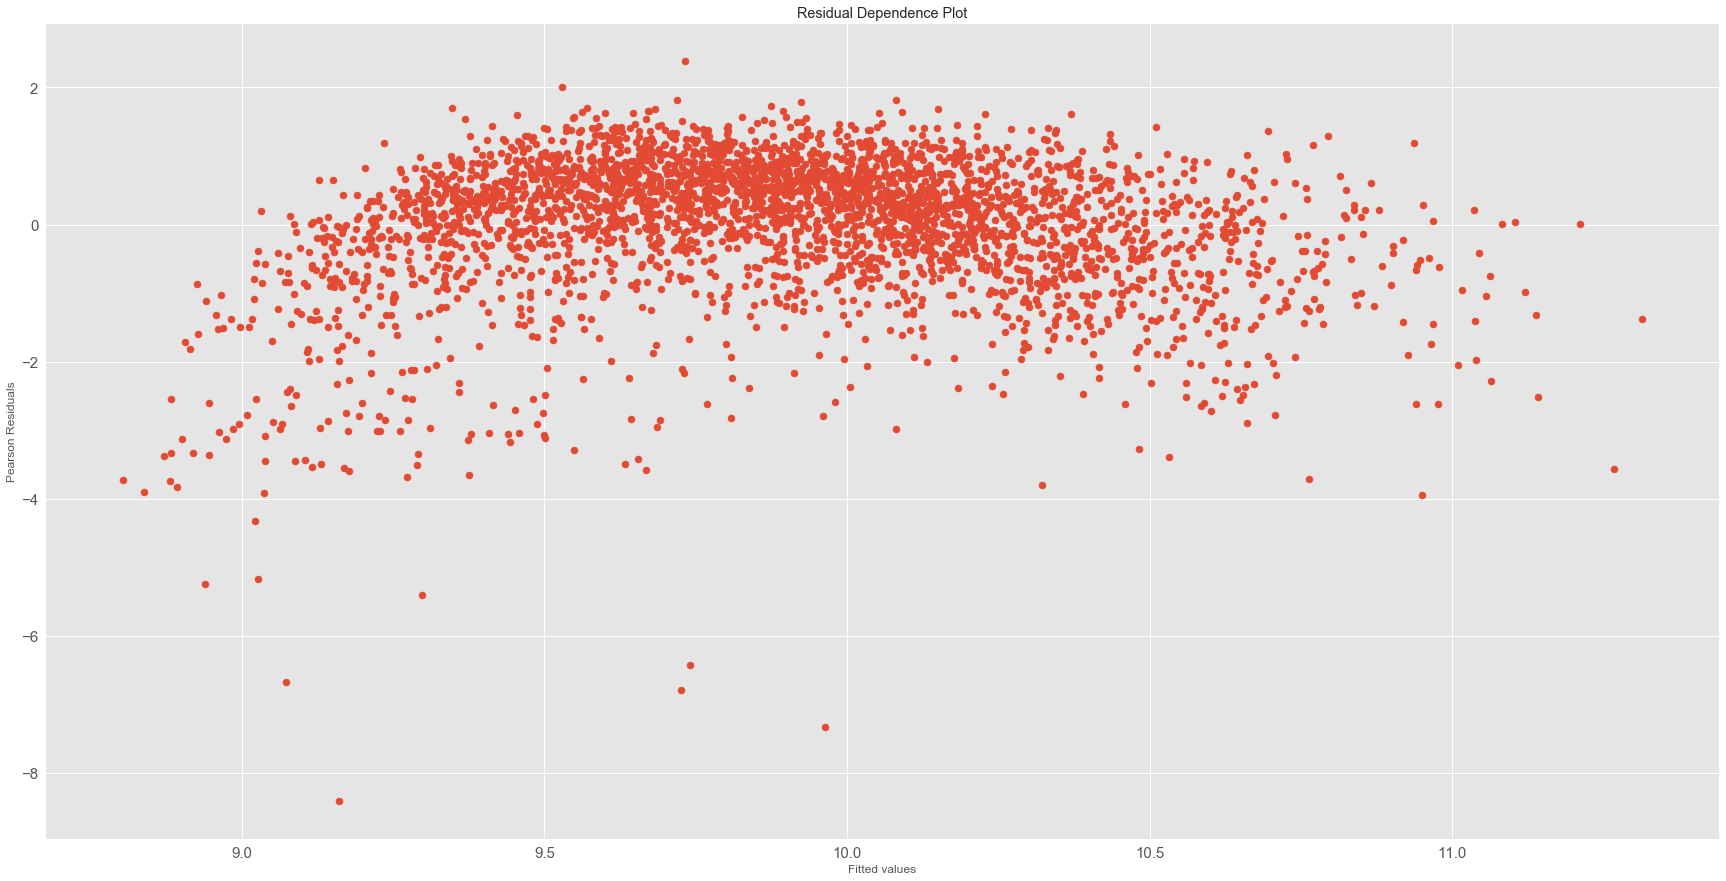

In [152]:
predictions = results_un.predict()
median = np.median(y)

fig, ax = plt.subplots(figsize=(30,15))

ax.scatter([p if p > 0 else median for p in predictions ], results.resid_pearson)
# ax.hlines(0, 0, 1)
# ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

# These new interaction features and  elimination of unsignificant feature slightly improved accuracy up to 95 %

## Describe how drivers of costs of care look like

In [153]:
coef_dict = results_un.params.copy()
p_values = results_un.pvalues.copy()
for k,v in coef_dict.items():
    if k == 'age_when_admission':
        coef_dict[k] = v*365

dicty = {}
for k, v in coef_dict.items():
    if 'medical' in k or 'preop' in k or 'symptom' in k or k in ['indian', 'malay', 'pr', 'chinese', 'singaporean'] \
    or 'month' in k or 'medical_history_1_medical_history_6' in k:
        if v > 0:
            dicty[k] = 'If %s is true, then cost of medication grows by %s percent' % (k, round((v*100),2))
        else:
            dicty[k] = 'If %s is true, then cost of medication decreases by %s percent' % (k, round((v*100),2))
    elif 'gender' in k:
        if v > 0:
            dicty[k] = 'If a patient is a man, then cost of medication grows by %s percent' % round((v*100),2)
        else:
            dicty[k] = 'If a patient is a man, then cost of medication decreases by %s percent' % round((v*100),2)
    elif k == 'const':
        dicty[k] = 'If all predictors are set to 0, then we expect cost of medication as %s' % round(np.exp(v),0)
    elif k == 'age_when_admission':
        dicty[k] = 'If the age of a patient is higher than average value among patients by 1 year, then we expect a growth, otherwise a decrease  by %s percent' % round((v*100),2)
    else: 
        if v > 0:
            dicty[k] = 'If %s increased by 1, then costs of medication grow by %s percent' % (k, round((v*100),4))
        else:
            dicty[k] = 'If %s increased by 1, then costs of medication decrease by %s percent' % (k, round((v*100),4))

result_frame = pd.DataFrame(coef_dict).reset_index()
result_frame.columns = ['predictor', 'coef_value']
result_frame['pvalue'] = result_frame['predictor'].map(p_values)
result_frame = result_frame[result_frame['pvalue'] <= 0.05
                           ]
result_frame['meaning'] = result_frame['predictor'].map(dicty)
result_frame['abs_coef_value'] = abs(result_frame['coef_value'])
result_frame['pvalue'] = result_frame['pvalue'].map(lambda x: round(x, 2))
pd.set_option('max_colwidth', 10000)

result_frame.sort_values(by = ['abs_coef_value'], ascending = False).drop('abs_coef_value', axis = 1)

predictor  coef_value  pvalue  \
0                                 const    8.892627    0.00   
21                           mass_index    1.028132    0.00   
26                          singaporean   -0.693584    0.00   
27                                   pr   -0.512043    0.00   
17                            symptom_5    0.506376    0.00   
25                                malay    0.340556    0.00   
1                     medical_history_1    0.285539    0.00   
15                            symptom_3    0.197414    0.00   
14                            symptom_2    0.181637    0.00   
6                     medical_history_6    0.175541    0.00   
16                            symptom_4    0.168044    0.00   
13                            symptom_1    0.132504    0.00   
24                              chinese   -0.100908    0.00   
23                               indian    0.092410    0.00   
5                     medical_history_5    0.059650    0.00   
32  medical_history_1_medical_history_6   -0.046188    0.00   
7                     medical_history_7    0.044517    0.00   
3                     medical_history_3    0.029521    0.00   
10                   preop_medication_3    0.025186    0.00   
12                   preop_medication_6    0.023229    0.00   
2                     medical_history_2    0.019685    0.00   
8                    preop_medication_1    0.019275    0.00   
11                   preop_medication_5    0.016713    0.00   
9                    preop_medication_2    0.015765    0.00   
28                   age_when_admission    0.009695    0.00   
19                               height    0.001518    0.00   
20                            stay_time   -0.001035    0.01   

                                                                                                                                          meaning  
0                                                                     If all predictors are set to 0, then we expect cost of medication as 7278.0  
21                                                                If mass_index increased by 1, then costs of medication grow by 102.8132 percent  
26                                                                    If singaporean is true, then cost of medication decreases by -69.36 percent  
27                                                                              If pr is true, then cost of medication decreases by -51.2 percent  
17                                                                           If symptom_5 is true, then cost of medication grows by 50.64 percent  
25                                                                               If malay is true, then cost of medication grows by 34.06 percent  
1                                                                    If medical_history_1 is true, then cost of medication grows by 28.55 percent  
15                                                                           If symptom_3 is true, then cost of medication grows by 19.74 percent  
14                                                                           If symptom_2 is true, then cost of medication grows by 18.16 percent  
6                                                                    If medical_history_6 is true, then cost of medication grows by 17.55 percent  
16                                                                            If symptom_4 is true, then cost of medication grows by 16.8 percent  
13                                                                           If symptom_1 is true, then cost of medication grows by 13.25 percent  
24                                                                        If chinese is true, then cost of medication decreases by -10.09 percent  
23                                                                               If indian is true, then cost of medication grows by 9.24 percent  
5                                            

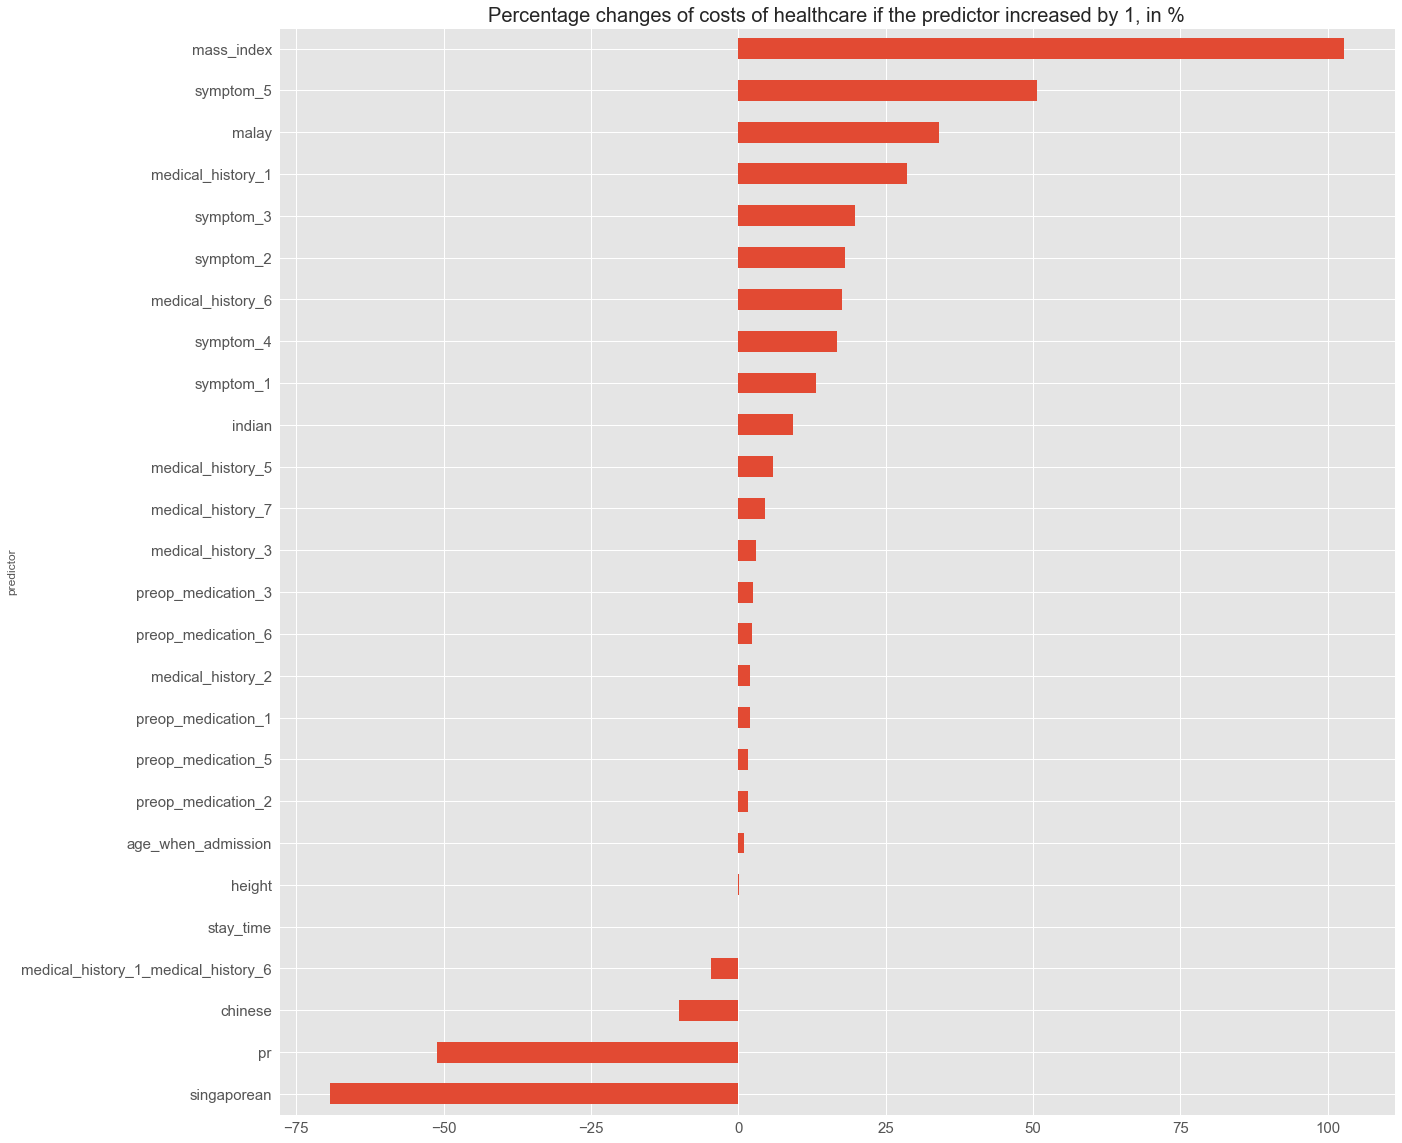

In [155]:
set_options()

fig, ax = plt.subplots(figsize=(20,20))
(result_frame[result_frame['predictor'] != 'const'].groupby('predictor')['coef_value'].sum().sort_values(ascending = True)*100).\
                            plot(kind = 'barh', ax = ax)
plt.title('Percentage changes of costs of healthcare if the predictor increased by 1, in %', fontsize = 20)
plt.show()